# Telecom Churn Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem by building a machine learning model to predict if a telecom customer will churn or not.
* Comprehend the given data set and perform Exploratory Data Analysis (EDA) to analyse the data set.
* Build a prediction model to identify the best fit variables that can predict the churning probability more accurately.

### Project Description

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Data Set Brief Information
The data set contains information about the customer and details of their respective telecom usage.
A data dictionary is provided along with the data set to understand various terms and variables used.

#### Business Objective
Analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

#### Business Solution
Build a machine learning model that is able to predict churning customers based on the features provided and their respective usage.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 4)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Import date time
import datetime
# Import train_test_split to split data to random train and test subsets
from sklearn.model_selection import train_test_split
# Import min-max scalar for scaling data
from sklearn.preprocessing import StandardScaler
# Importing RFE and Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Importing Grid Search
from sklearn.model_selection import GridSearchCV
# Import library to calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statistical model library
import statsmodels.api as sm
# Import various metrics for calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve
# Imporing SMOTENC
from imblearn.over_sampling import SMOTENC
# Import PCA
from sklearn.decomposition import PCA
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import Random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Import Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
# Import KFold
from sklearn.model_selection import KFold
# Import XGBoost
import xgboost as xgb
# Import Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Read the dataset
tc_df = pd.read_csv('train.csv')

In [3]:
# Check the shape of the dataframe
print('The given data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(tc_df.shape[0],tc_df.shape[1]))

The given data set have 69999 rows and 172 columns.

Let's see first 5 values of data set.


In [4]:
# Check the first five rows
tc_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

**Get the concise summary of data set and data type of each column**

In [5]:
# Check the dataframe info
tc_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence imputation might be required.

3) Several Date columns are present to indicate different recharge done for particular month.

4) Some features indicate Minutes of Usage (MOU), but it is not specified in name.

5) 6th, 7th and 8th month convention is used to represent feature names for June, July and August. We will use similar convention for Volume Based Cost (VBC) feature.

6) Some features looks to be categorical in nature, but it is marked as float type. We need to analyze more on data type conversion


### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [6]:
# Check if there is any duplicated entries in rows
tc_df[tc_df.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


**Observation** : There are no such rows that have duplicated entries.

#### Data Analysis

With the help of data dictionary, let's analyse each values filled in columns and understand their respective meaning.

**Observations**

1) Column 'id' is not required as it is an index variable.

2) Date columns is not required, since we need to know only recharge amount and other telecom features done for that particular month.

#### Data Filtering

In [7]:
# Remove id column as it is not required
tc_df.drop(labels = 'id', axis = 1, inplace = True)
dropped_columns = ['id']

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [8]:
# Check the number of columns having null values across entire index range
tc_df.isnull().all().sum()

0

In [9]:
# Check the number of rows having null values across entire column range
tc_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

In [10]:
# Rename column names as per majority convension
temp_dict = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
             'og_others_6' : 'og_others_mou_6', 'og_others_7' : 'og_others_mou_7', 'og_others_8' : 'og_others_mou_8',
             'ic_others_6' : 'ic_others_mou_6', 'ic_others_7' : 'ic_others_mou_7', 'ic_others_8' : 'ic_others_mou_8'}
tc_df = tc_df.rename(temp_dict, axis=1)

In [11]:
# Get the columns with 'date' in its name
list_of_columns = [d for d in tc_df.columns.to_list() if 'date' in d]
print('Date columns are:\n', list_of_columns)

Date columns are:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [12]:
# Function to display the percentage of missing data above a threshold limit
def find_missing_percentage(df, col, th):
    percent_missing = (df[col].isnull().sum() * 100 / len(df)).sort_values(ascending = False)
    percent_missing = percent_missing[percent_missing > th]
    pd.set_option("display.max_rows", None)
    print(percent_missing)
    pd.set_option("display.max_rows", 10)

In [13]:
# Find percentage of missing values in date column
find_missing_percentage(tc_df, list_of_columns, 0)

date_of_last_rech_data_6    74.9025
date_of_last_rech_data_7    74.4782
date_of_last_rech_data_8    73.6896
date_of_last_rech_8          3.5158
date_of_last_rech_7          1.7629
date_of_last_rech_6          1.5729
last_date_of_month_8         1.0472
last_date_of_month_7         0.5700
dtype: float64


**Observation** : There are lot of missing values in columns. As such these columns doesn't help in prediction, since probability of churning depends on if customer recharge amount is low or zero for consecutive months. So, let's delete these columns.

In [14]:
# Remove date columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [15]:
# Display all columns having at least one null value present in its rows
tc_df.columns[tc_df.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=117)

In [16]:
# Find percentage of missing values in dataframe
find_missing_percentage(tc_df, tc_df.columns, 0)

total_rech_data_6     74.9025
arpu_2g_6             74.9025
arpu_3g_6             74.9025
fb_user_6             74.9025
night_pck_user_6      74.9025
av_rech_amt_data_6    74.9025
max_rech_data_6       74.9025
count_rech_3g_6       74.9025
count_rech_2g_6       74.9025
count_rech_2g_7       74.4782
fb_user_7             74.4782
night_pck_user_7      74.4782
total_rech_data_7     74.4782
max_rech_data_7       74.4782
arpu_3g_7             74.4782
arpu_2g_7             74.4782
count_rech_3g_7       74.4782
av_rech_amt_data_7    74.4782
fb_user_8             73.6896
arpu_3g_8             73.6896
max_rech_data_8       73.6896
arpu_2g_8             73.6896
count_rech_2g_8       73.6896
av_rech_amt_data_8    73.6896
total_rech_data_8     73.6896
count_rech_3g_8       73.6896
night_pck_user_8      73.6896
loc_ic_t2f_mou_8       5.2901
spl_og_mou_8           5.2901
og_others_mou_8        5.2901
isd_og_mou_8           5.2901
loc_ic_t2t_mou_8       5.2901
std_ic_mou_8           5.2901
loc_ic_mou

In [17]:
# Get the columns with 'mou' (Minutes of usage voice calls) in its name
list_of_columns = [m for m in tc_df.columns.to_list() if 'mou' in m]
print('MOU columns are:\n', list_of_columns)

MOU columns are:
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'to

In [18]:
# Check the percentile and min-max of MOU columns
tc_df[list_of_columns].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8
count,69297.0,69297.0,69297.0,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.000,67231.0000,67312.0000,66296.0000,67231.0,67312.0,66296.0,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,69999.0000,69999.0000,69999.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0,67312.0,66296.0,67231.0000,67312.0000,66296.0000,69999.0000,69999.0000,69999.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000
mean,0.0,0.0,0.0,133.1533,133.8944,132.9783,198.8748,197.1534,196.5436,9.7654,7.0146,7.0049,14.1865,9.8422,9.7718,46.9049,46.1665,45.6861,93.2382,90.7992,91.1214,3.7432,3.7770,3.6617,1.1260,1.3611,1.4208,143.8936,140.7501,140.4765,80.6194,83.7759,83.4715,88.1521,91.5386,90.587,1.1264,1.0841,1.0577,0.0,0.0,0.0,169.9006,176.4012,175.1189,0.8458,0.8111,0.8416,3.9586,4.9768,5.0450,0.4626,0.0244,0.0331,306.4514,310.5727,304.5131,48.0433,47.8827,47.2564,107.1524,106.4899,108.1547,12.0507,12.5637,11.7168,167.2551,166.9451,167.1368,9.4770,9.8735,9.9102,20.7349,21.6854,21.0890,2.1463,2.1994,2.0752,0.0,0.0,0.0,32.3606,33.7608,33.0770,199.7106,201.8780,198.4860,0.0619,0.0334,0.0404,7.3942,8.1712,8.3484,0.8541,1.0197,0.9632
std,0.0,0.0,0.0,299.9631,311.2772,311.8966,316.8184,322.4822,324.0892,57.3744,55.9610,53.4081,73.4693,58.5119,64.6184,150.9718,154.7390,153.7169,162.0467,153.8526,152.9978,13.3195,13.5681,13.0092,5.7418,7.9141,6.5422,252.0346,246.3131,245.3424,255.0984,266.6933,267.0219,255.7716,267.5321,270.032,8.1366,8.3252,7.6969,0.0,0.0,0.0,392.0466,409.2995,410.6971,29.7475,29.2201,29.5634,15.8545,22.2298,17.7085,4.7684,1.7164,2.2325,465.5029,479.1318,477.9368,140.4998,147.7611,141.2494,168.4560,165.4525,166.2235,39.4161,43.4952,38.6069,252.5762,254.6887,249.2884,51.6645,56.1378,54.2482,80.2942,87.3145,81.5343,16.5222,16.1715,15.8654,0.0,0.0,0.0,104.3811,114.1422,108.4699,290.1148,296.7713,288.3367,0.1648,0.1373,0.1484,60.9512,63.6042,63.0976,12.1491,13.2254,11.6977
min,0.0,0.0

**Observation** : Minimum value in MOU columns are zero. Hence we can impute the missing values as zero, as it means that customer didn't initiate or receive a call.

In [19]:
# Impute zero for missing values in MOU columns
for col in list_of_columns:
    tc_df[col].fillna(0.00, inplace=True)

In [20]:
# Find all unique values in below features of dataset
list_of_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in list_of_columns:
    print(tc_df[col].value_counts())

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64


**Observation** : Above features are kind of categorical in nature - Yes or No type and more than 70% values are missing. We can't impute values as we can't predict if a customer applied for this particular scheme. Also dataframe doesn't imply anything specific or in relation to this scheme to predict or fill values. Hence we will drop these columns

In [21]:
# Remove fb and night pack feature columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [22]:
# Check the percentile and min-max of following columns
list_of_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
                   'max_rech_data_8']
tc_df[list_of_columns].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,2.4676,2.6800,2.6524,126.5000,126.4021,125.3749
std,2.7946,3.0735,3.1013,109.3526,109.4593,109.6488
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,1.0000,1.0000,1.0000,25.0000,25.0000,25.0000
50%,1.0000,2.0000,1.0000,145.0000,145.0000,145.0000
75%,3.0000,3.0000,3.0000,177.0000,177.0000,179.0000
max,61.0000,54.0000,60.0000,1555.0000,1555.0000,1555.0000


**Observation** : Minimum value of above columns are one and 70% values are missing. Even if we impute it with zero, there is less chance that these varibales help in predicting churn probability. Hence we will delete these features.

In [23]:
# Remove data feature columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [24]:
# Check the percentile and min-max of following columns
list_of_columns = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
tc_df[list_of_columns].describe()

,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.0000,17865.0000,18417.0000
mean,192.8311,201.4559,196.8158
std,190.6231,198.3461,192.2805
min,1.0000,1.0000,1.0000
25%,82.0000,92.0000,84.0000
50%,154.0000,154.0000,154.0000
75%,252.0000,252.0000,252.0000
max,5920.0000,4365.0000,4076.0000


**Observation** : Minimum value is zero. Hence we can impute the missing values as zero, as it means that customer didn't use Other Telecom feature facility.

In [25]:
# Impute zero for missing values in above columns
for col in list_of_columns:
    tc_df[col].fillna(0, inplace=True)

In [26]:
# Check the percentile and min-max of following columns
list_of_columns = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
                   'count_rech_3g_8']
tc_df[list_of_columns].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,1.8653,2.0563,2.0160,0.6023,0.6237,0.6364
std,2.5664,2.7999,2.7282,1.2793,1.4012,1.4571
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
50%,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
75%,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
max,42.0000,48.0000,44.0000,29.0000,34.0000,45.0000


**Observation** : More than 70% values are missing and minimum value is 0. Hence rather than imputing, we can remove this column as we don't depend on how many times recharge was done. We need to focus only on total volume of recharge done.

In [27]:
# Remove count number of recharge done for 2g and 3g category columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [28]:
# Check the percentile and min-max of following columns
list_of_columns = ['og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'ic_others_mou_6', 'ic_others_mou_7',
                   'ic_others_mou_8']
tc_df[list_of_columns].describe()

,og_others_mou_6,og_others_mou_7,og_others_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8
count,69999.0000,69999.0000,69999.0000,69999.0000,69999.0000,69999.0000
mean,0.4443,0.0235,0.0313,0.8203,0.9805,0.9123
std,4.6741,1.6832,2.1727,11.9077,12.9705,11.3861
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,800.8900,270.2400,394.9300,1362.9400,1495.9400,1209.8600


**Observation** : Minimum value is zero. Hence we can impute the missing values as zero, as it means that customer didn't use Other Telecom feature facility.

In [29]:
# Impute zero for missing values in above columns
for col in list_of_columns:
    tc_df[col].fillna(0, inplace=True)

In [30]:
# Check the percentile and min-max of following columns
list_of_columns = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
tc_df[list_of_columns].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,90.0699,89.1158,90.6186,86.8639,85.8461,86.3484
std,193.6004,195.8270,189.9080,171.3212,178.0673,170.2971
min,-20.3800,-26.0400,-24.4900,-35.8300,-13.0900,-55.8300
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.5200,0.4200,0.8400,11.3000,8.8000,9.0900
75%,122.0700,120.8600,122.0700,122.0700,122.0700,122.0700
max,5054.3700,4980.9000,3716.9000,5054.3500,4809.3600,3483.1700


**Observation** : Revenue per user for different telecom operator features depends totally on the price and volume of recharge done for that particular feature. We can see that there are negative values present in dataset, which indicates telecom decreased price and volume of recharge was more! We **can't impute** values here as we don't know price of that feature and revenue calculation depends on that. Hence we will remove these columns as their missing percentage is greater than 70% and we can't impute any value.

In [31]:
# Remove average revenue per users for 2g and 3g category columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [32]:
# Find percentage of missing values in date column
find_missing_percentage(tc_df, tc_df.columns, 0)

Series([], dtype: float64)


**Observation** : We have no feature with missing values.

In [33]:
# Function to print feature name, if unique count is 1
def find_unique_count(df, list_of_columns):
    unique_columns = []
    print('Column Name\t\tUnique Value Count')
    print('-----------\t\t------------------')
    for col in list_of_columns:
        length = len(df[col].unique())
        if length <= 1:
            print('{0}\t\t{1}'.format(col, length))
            unique_columns.append(col)
    return unique_columns

In [34]:
# Get unique count of features with only one value
list_of_columns = find_unique_count(tc_df, tc_df.columns)

Column Name		Unique Value Count
-----------		------------------
circle_id		1
loc_og_t2o_mou		1
std_og_t2o_mou		1
loc_ic_t2o_mou		1
std_og_t2c_mou_6		1
std_og_t2c_mou_7		1
std_og_t2c_mou_8		1
std_ic_t2o_mou_6		1
std_ic_t2o_mou_7		1
std_ic_t2o_mou_8		1


**Observation** - Features with one unique value is not going to help in predicting churn probability. Hence we will remove these features as well.

In [35]:
# Remove columns with only one unique value
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

### High Value Customers (HVC)

As per telecom standard, we will only consider HVC data for predicting churn probability. Basically these customers are responsible for bringing in high revenue to telecom. Hence we will drop all data entries which have low impact in the revenue.
To get HVC, we take average of total recharge done by customers during 6th and 7th month. And then taking a 70% cut-off value as threshold.

In [36]:
# Find average of total recharge done at month 6 and 7
tc_df['avg_rech_amt_6_7'] = tc_df[['total_rech_amt_6', 'total_rech_amt_7', 'av_rech_amt_data_6','av_rech_amt_data_7']].mean(axis=1)

In [37]:
# Get 70th percentile as cut-off
cut_off = tc_df['avg_rech_amt_6_7'].quantile(0.70)
print('Cut-off value for High Value Customer is ', cut_off)

Cut-off value for High Value Customer is  215.5


In [38]:
# Filter out only 30% customer data as HVC
tc_df = tc_df[tc_df['avg_rech_amt_6_7'] > cut_off]

In [39]:
# Delete average column
tc_df.drop(labels = 'avg_rech_amt_6_7', axis = 1, inplace = True)

In [40]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(tc_df.shape[0], tc_df.shape[1]))

The data set now have 20995 rows and 128 columns


In [41]:
# Calculate churn probability class percentage
ratio = round(100*(tc_df['churn_probability'].mean()),2)
print('The dataset have only {0} % churned class'.format(ratio))

The dataset have only 8.38 % churned class


**Observation** : This value is very less when compared to overall dataset. This indicates **CLASS IMBALANCE** and we need to handle this for accurate predictions!

### Check Correlated Features

Remove any highly correlated features from dataset. We have lot of MOU columns and we will analyze to see if these variables are dependent on each other.

In [42]:
# Plotting correlations on a heatmap
def plot_corr_matrix(df, list_of_columns):
    list_of_columns = list_of_columns.to_list()
    list_of_columns += ['churn_probability']
    mask = np.array(df[list_of_columns].corr())
    mask[np.tril_indices_from(mask)] = False
    corr_matrix = df[list_of_columns].corr()
    plt.figure(figsize=(15, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap="YlGnBu", annot=True)
    plt.show()

Now let's observe all Outgoing and Incoming call related features of month 6

#### Outgoing calls MOU for month 6

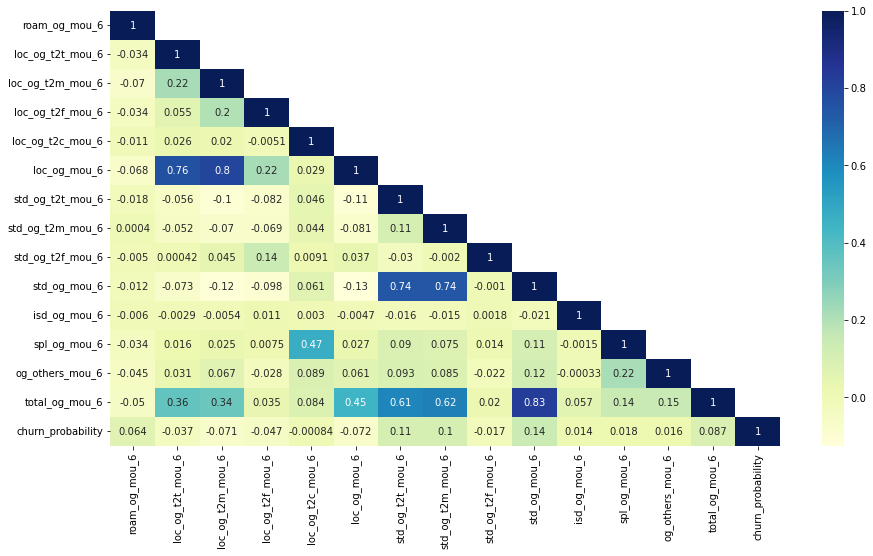

In [43]:
# Get list of Outgoing calls MOU for month 6
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_6', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature. By an assumption of domain knowledge, we can expect below points to be true.

* loc_og_mou_6 is equivalent to sum of loc_og_t2t_mou_6, loc_og_t2m_mou_6 and loc_og_t2f_mou_6
* std_og_mou_6 is equivalent to sum of std_og_t2t_mou_6, std_og_t2m_mou_6 and std_og_t2f_mou_6
* total_og_mou_6 is equivalent to sum of loc_og_mou_6, std_og_mou_6, isd_og_mou_6, spl_og_mou_6 and og_others_mou_6
* Remove loc_og_t2c_mou_6 have very less correlation with churn_probability, hence we will remove this feature.

We will verify the above points for confirmation and then delete the correlated feature.

In [44]:
# Check sum of OG of t2t, t2m and t2f MOU is similar to OG MOU for Local Calls
print('There are {0} entries in dataframe where difference of OG MOU is not similar to sum of OG\'s within T2T, T2M, T2F for Local Calls'
      .format(len(tc_df[(tc_df['loc_og_mou_6'] - (tc_df['loc_og_t2t_mou_6'] + tc_df['loc_og_t2m_mou_6'] + 
                                                  tc_df['loc_og_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of OG MOU is not similar to sum of OG's within T2T, T2M, T2F for Local Calls


In [45]:
# Check sum of OG of t2t, t2m and t2f MOU is similar to OG MOU for STD Calls
print('There are {0} entries in dataframe where difference of OG MOU is not similar to sum of OG\'s within T2T, T2M, T2F for STD Calls'
      .format(len(tc_df[(tc_df['std_og_mou_6'] - (tc_df['std_og_t2t_mou_6'] + tc_df['std_og_t2m_mou_6'] + 
                                                  tc_df['std_og_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of OG MOU is not similar to sum of OG's within T2T, T2M, T2F for STD Calls


In [46]:
# Check sum of OG of local, STD, ISD, Special and Others MOU is similar to Total OG MOU
print('There are {0} entries in dataframe where difference of Total OG MOU is not similar to sum of OG\'s of local, STD, ISD, Special and Others MOU'
      .format(len(tc_df[(tc_df['total_og_mou_6'] - (tc_df['loc_og_mou_6'] + tc_df['std_og_mou_6'] + tc_df['isd_og_mou_6']
                                                    + tc_df['spl_og_mou_6'] + tc_df['og_others_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of Total OG MOU is not similar to sum of OG's of local, STD, ISD, Special and Others MOU


#### Incoming calls MOU for month 6

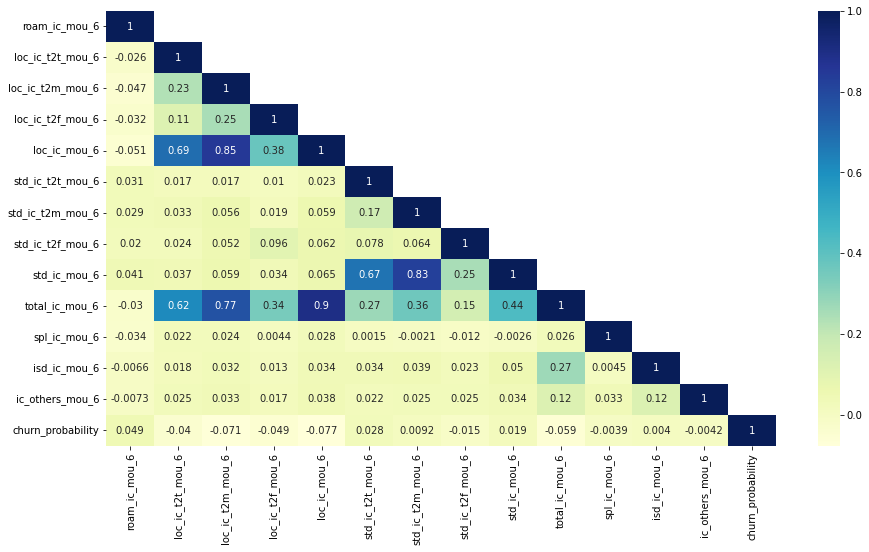

In [47]:
# Get list of Incoming calls MOU for month 6
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_6', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature. By an assumption of domain knowledge, we can expect below points to be true.

* loc_ic_mou_6 is equivalent to sum of loc_ic_t2t_mou_6, loc_ic_t2m_mou_6 and loc_ic_t2f_mou_6
* std_ic_mou_6 is equivalent to sum of std_ic_t2t_mou_6, std_ic_t2m_mou_6 and std_ic_t2f_mou_6
* total_ic_mou_6 is equivalent to sum of loc_ic_mou_6, std_ic_mou_6, isd_ic_mou_6, spl_ic_mou_6 and ic_others_mou_6
* Remove spl_ic_mou_6, isd_ic_mou_6, ic_others_mou_6 have very less correlation with churn_probability, hence we will remove these features.

We will verify the above points for confirmation and then delete the correlated feature.

In [48]:
# Check sum of IC of t2t, t2m and t2f MOU is similar to IC MOU for Local Calls
print('There are {0} entries in dataframe where difference of IC MOU is not similar to sum of IC\'s within T2T, T2M, T2F for Local Calls'
      .format(len(tc_df[(tc_df['loc_ic_mou_6'] - (tc_df['loc_ic_t2t_mou_6'] + tc_df['loc_ic_t2m_mou_6'] + 
                                                  tc_df['loc_ic_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of IC MOU is not similar to sum of IC's within T2T, T2M, T2F for Local Calls


In [49]:
# Check sum of IC of t2t, t2m and t2f MOU is similar to IC MOU for STD Calls
print('There are {0} entries in dataframe where difference of IC MOU is not similar to sum of IC\'s within T2T, T2M, T2F for STD Calls'
      .format(len(tc_df[(tc_df['std_ic_mou_6'] - (tc_df['std_ic_t2t_mou_6'] + tc_df['std_ic_t2m_mou_6'] + 
                                                  tc_df['std_ic_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of IC MOU is not similar to sum of IC's within T2T, T2M, T2F for STD Calls


In [50]:
# Check sum of IC of local, STD, ISD, Special and Others MOU is similar to Total IC MOU
print('There are {0} entries in dataframe where difference of Total IC MOU is not similar to sum of IC\'s of local, STD, ISD, Special and Others MOU'
      .format(len(tc_df[(tc_df['total_ic_mou_6'] - (tc_df['loc_ic_mou_6'] + tc_df['std_ic_mou_6'] + tc_df['isd_ic_mou_6']
                                                    + tc_df['spl_ic_mou_6'] + tc_df['ic_others_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of Total IC MOU is not similar to sum of IC's of local, STD, ISD, Special and Others MOU


**Observation** : So our assumption is correct. Same is applicable for month 7 and 8. Let's remove these features from dataset after analysing their respective churn ratio and correlation

#### Outgoing calls MOU for month 7

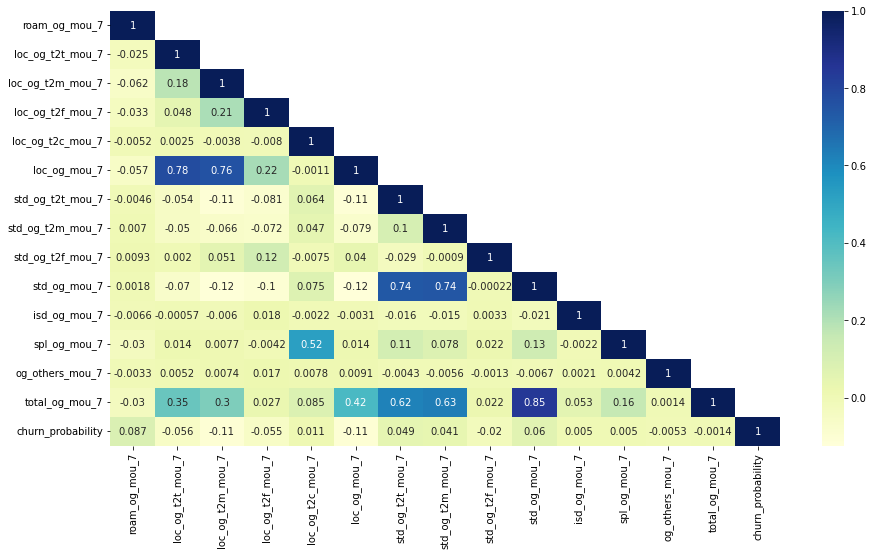

In [51]:
# Get list of Outgoing calls MOU for month 7
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_7', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove isd_og_mou_7, spl_og_mou_7, og_others_mou_7 have very less correlation with churn_probability, hence we will remove these features.

#### Incoming calls MOU for month 7

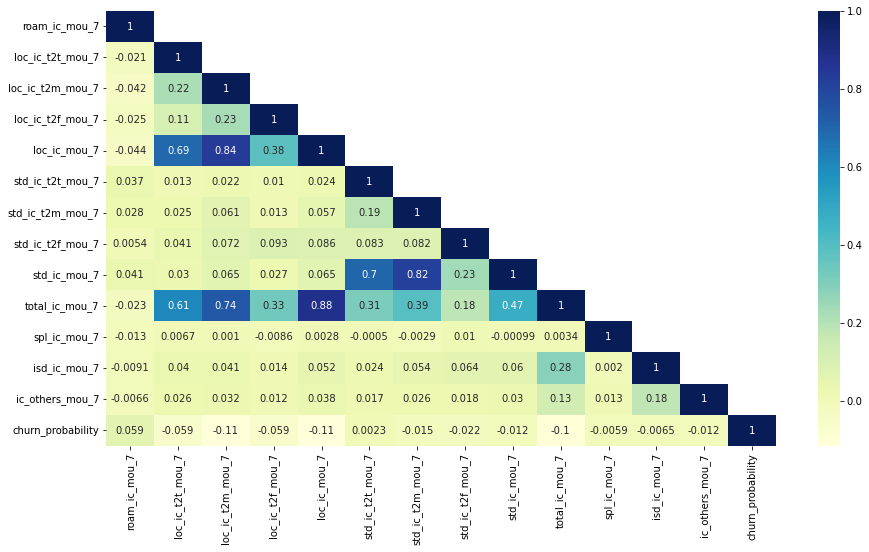

In [52]:
# Get list of Incoming calls MOU for month 7
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_7', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove std_ic_t2t_mou_7, spl_ic_mou_7, isd_ic_mou_7 have very less correlation with churn_probability, hence we will remove this feature.

#### Outgoing calls MOU for month 8

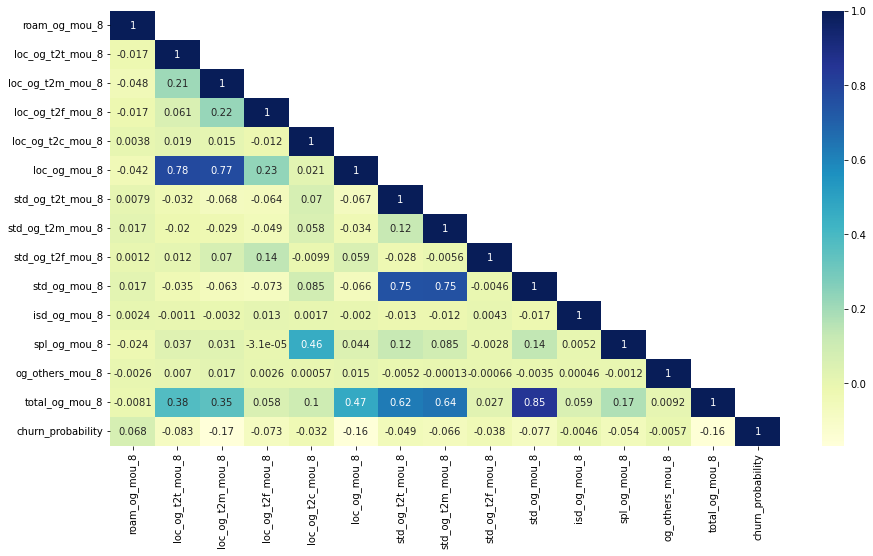

In [53]:
# Get list of Outgoing calls MOU for month 8
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_8', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove isd_og_mou_8, og_others_mou_8 have very less correlation with churn_probability, hence we will remove these features.

#### Incoming calls MOU for month 8

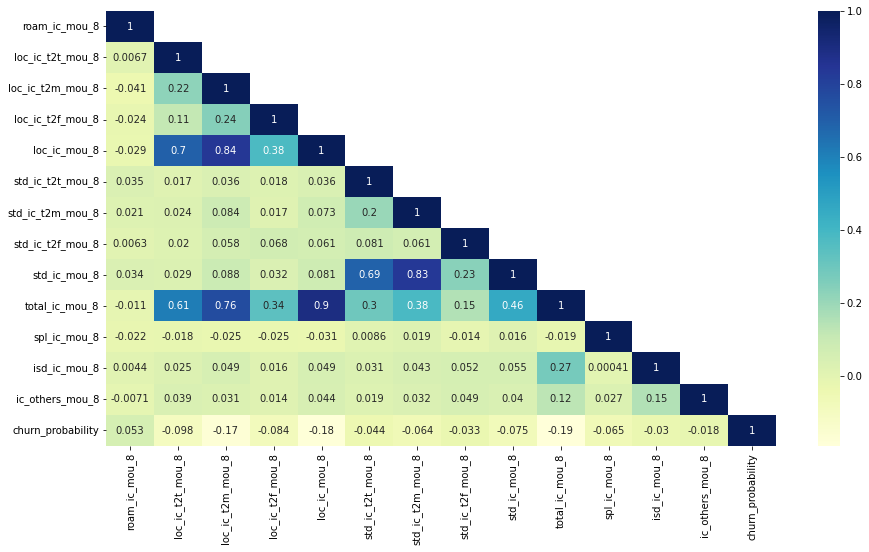

In [54]:
# Get list of Incoming calls MOU for month 8
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_8', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

In [55]:
# Function to plot bar chart of list of columns based on churning probability
bar_color_code = 0
bar_color_list = ['flare', 'crest']

def bar_plot(df, list_of_columns):
    global bar_color_code
    hlen = len(list_of_columns)
    temp_df = pd.DataFrame()
    temp_df['No Churn'] = tc_df[tc_df['churn_probability'] == 0][list_of_columns].mean()
    temp_df['Churn'] = tc_df[tc_df['churn_probability'] == 1][list_of_columns].mean()
    temp_df.plot.bar(rot=0, figsize=(hlen * 2,5), colormap=bar_color_list[bar_color_code])
    bar_color_code += 1
    bar_color_code %= 2
    plt.show()

In [56]:
# Function to plot boxplot of list of columns based on churning probability
box_color_code = 0
box_color_list = ['flare', 'crest']

def box_plot(df, pattern):
    global box_color_code
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    sns.violinplot(y=pattern+'6', x='churn_probability', data=df, ax = axes[0])
    sns.violinplot(y=pattern+'7', x='churn_probability', data=df, ax = axes[1])
    sns.violinplot(y=pattern+'8', x='churn_probability', data=df, ax = axes[2])
    box_color_code += 1
    box_color_code %= 2
    plt.show()

In [57]:
# Function to display correlation of given columns with target variable
def display_correlation(df, list_of_columns):
    list_of_columns += ['churn_probability']
    corr_matrix = df[list_of_columns].corr()
    return corr_matrix

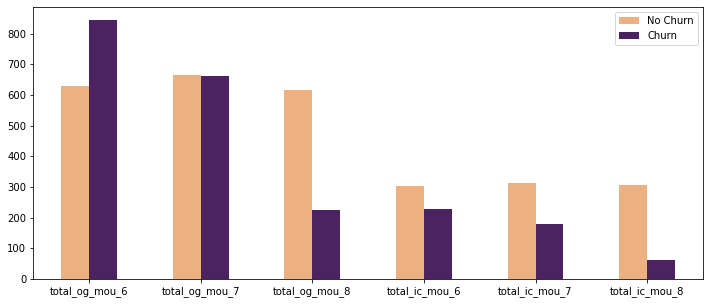

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,churn_probability
total_og_mou_6,1.0000,0.6841,0.5372,0.1462,0.0751,0.0500,0.0872
total_og_mou_7,0.6841,1.0000,0.7616,0.0408,0.1237,0.0883,-0.0014
total_og_mou_8,0.5372,0.7616,1.0000,0.0498,0.1097,0.1806,-0.1552
total_ic_mou_6,0.1462,0.0408,0.0498,1.0000,0.7999,0.7057,-0.0589
total_ic_mou_7,0.0751,0.1237,0.1097,0.7999,1.0000,0.8217,-0.1036
total_ic_mou_8,0.0500,0.0883,0.1806,0.7057,0.8217,1.0000,-0.1920
churn_probability,0.0872,-0.0014,-0.1552,-0.0589,-0.1036,-0.1920,1.0000


In [58]:
# Display barplot of Total Outgoing and Incoming calls MOU for all months
list_of_columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                   'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see outgoing calls drastically decreasing during different months for customers who churned.
Incoming calls have less role during 6th and 7th month, while 8th month indicates a definite decrease.

This clearly indicates that the customer who churned will definitely stop outgoing and incoming calls.

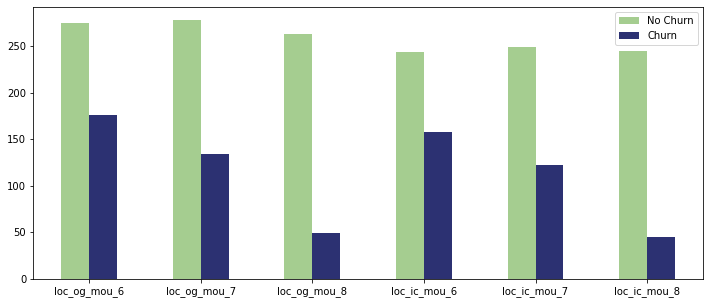

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,churn_probability
loc_og_mou_6,1.0000,0.8057,0.7364,0.4561,0.3904,0.3700,-0.0720
loc_og_mou_7,0.8057,1.0000,0.8401,0.3733,0.4343,0.3981,-0.1064
loc_og_mou_8,0.7364,0.8401,1.0000,0.3453,0.3888,0.4494,-0.1623
loc_ic_mou_6,0.4561,0.3733,0.3453,1.0000,0.8170,0.7422,-0.0771
loc_ic_mou_7,0.3904,0.4343,0.3888,0.8170,1.0000,0.8440,-0.1147
loc_ic_mou_8,0.3700,0.3981,0.4494,0.7422,0.8440,1.0000,-0.1836
churn_probability,-0.0720,-0.1064,-0.1623,-0.0771,-0.1147,-0.1836,1.0000


In [59]:
# Display barplot of Local Outgoing and Incoming calls MOU for all months
list_of_columns = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                   'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Local outgoing and incoming call decreases at same rate for customers who churned.

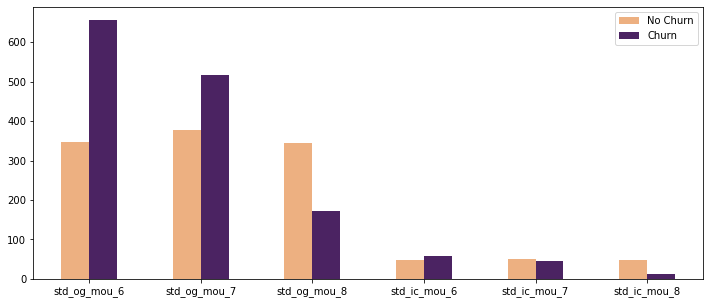

,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,churn_probability
std_og_mou_6,1.0000,0.7256,0.5708,0.1341,0.0788,0.0646,0.1402
std_og_mou_7,0.7256,1.0000,0.7847,0.0824,0.1298,0.1119,0.0601
std_og_mou_8,0.5708,0.7847,1.0000,0.0676,0.1007,0.1540,-0.0774
std_ic_mou_6,0.1341,0.0824,0.0676,1.0000,0.7343,0.5872,0.0193
std_ic_mou_7,0.0788,0.1298,0.1007,0.7343,1.0000,0.7445,-0.0120
std_ic_mou_8,0.0646,0.1119,0.1540,0.5872,0.7445,1.0000,-0.0745
churn_probability,0.1402,0.0601,-0.0774,0.0193,-0.0120,-0.0745,1.0000


In [60]:
# Display barplot of STD Outgoing and Incoming calls MOU for all months
list_of_columns = ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
                   'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : STD outgoing calls decreases more than incoming calls for customers who churned.

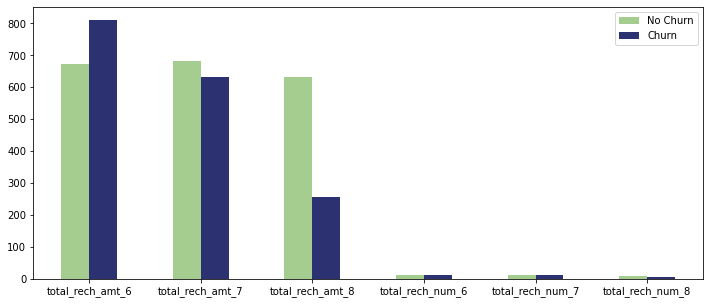

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,churn_probability
total_rech_amt_6,1.0000,0.6193,0.6065,0.3235,0.1030,0.1022,0.0681
total_rech_amt_7,0.6193,1.0000,0.7279,0.1343,0.2850,0.2048,-0.0241
total_rech_amt_8,0.6065,0.7279,1.0000,0.1079,0.1807,0.3478,-0.1652
total_rech_num_6,0.3235,0.1343,0.1079,1.0000,0.7016,0.5829,0.0598
total_rech_num_7,0.1030,0.2850,0.1807,0.7016,1.0000,0.7669,-0.0172
total_rech_num_8,0.1022,0.2048,0.3478,0.5829,0.7669,1.0000,-0.1513
churn_probability,0.0681,-0.0241,-0.1652,0.0598,-0.0172,-0.1513,1.0000


In [61]:
# Display barplot of Total number of times recharged and total recharge amount for all months
list_of_columns = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                   'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Total recharge amount decreases for customers who churned. While total number of recharge done plays less role when numbers are compared, hence we will drop this feature.

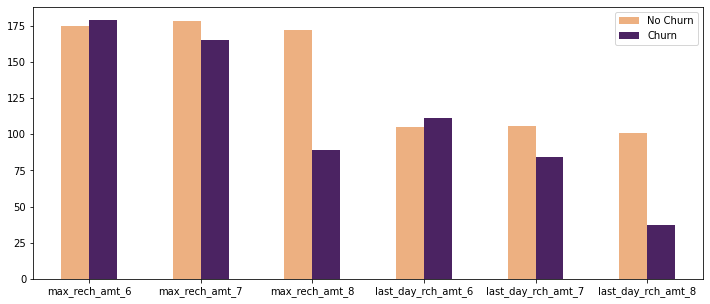

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,churn_probability
max_rech_amt_6,1.0000,0.4535,0.5684,0.6574,0.2974,0.3863,0.0064
max_rech_amt_7,0.4535,1.0000,0.5298,0.3271,0.6261,0.3717,-0.0212
max_rech_amt_8,0.5684,0.5298,1.0000,0.4155,0.3635,0.6767,-0.1381
last_day_rch_amt_6,0.6574,0.3271,0.4155,1.0000,0.3006,0.3408,0.0121
last_day_rch_amt_7,0.2974,0.6261,0.3635,0.3006,1.0000,0.3194,-0.0420
last_day_rch_amt_8,0.3863,0.3717,0.6767,0.3408,0.3194,1.0000,-0.1265
churn_probability,0.0064,-0.0212,-0.1381,0.0121,-0.0420,-0.1265,1.0000


In [62]:
# Display barplot of MAX recharge amount and Last day recharge amount for all months
list_of_columns = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see a definite decrease in recharge done in 8th month for customers who churned.

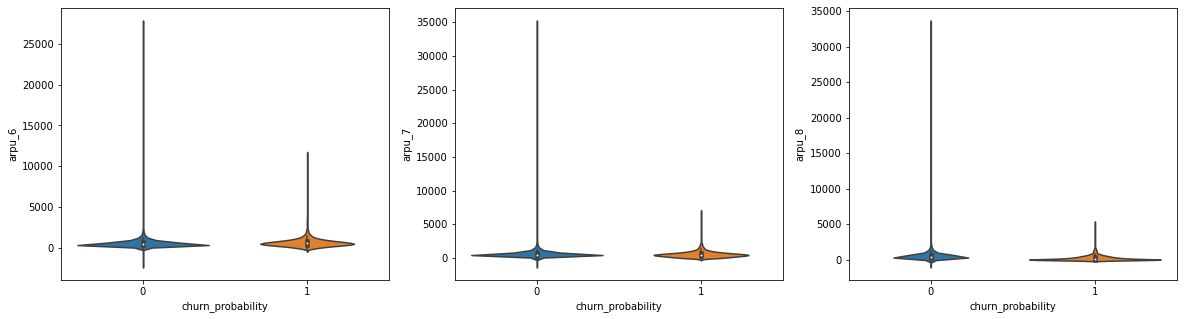

In [63]:
# Plot boxplot of Average Revenue per User for all months
box_plot(tc_df, 'arpu_')

In [64]:
# Display correlation of Average Revenue per User for all months with churn rate
list_of_columns = ['arpu_6', 'arpu_7', 'arpu_8']
display_correlation(tc_df, list_of_columns)

,arpu_6,arpu_7,arpu_8,churn_probability
arpu_6,1.0000,0.6757,0.6072,0.0681
arpu_7,0.6757,1.0000,0.7700,-0.0195
arpu_8,0.6072,0.7700,1.0000,-0.1654
churn_probability,0.0681,-0.0195,-0.1654,1.0000


**Observation**
* There are lot of outliers present. Since we deal with HVC, we can't remove any such entry with very high revenue.
* Spread is less for 8th month
* Churn rate for 6th month is concentrated on Median
* Each feature is correlated with churn rate at a good amount.

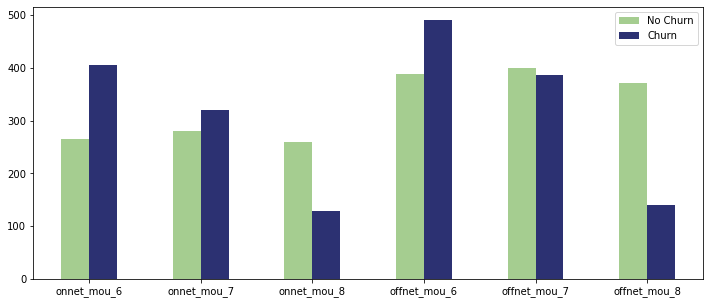

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,churn_probability
onnet_mou_6,1.0000,0.7353,0.6148,0.0586,0.0040,0.0059,0.0825
onnet_mou_7,0.7353,1.0000,0.8027,0.0175,0.0491,0.0432,0.0225
onnet_mou_8,0.6148,0.8027,1.0000,0.0334,0.0605,0.1052,-0.0773
offnet_mou_6,0.0586,0.0175,0.0334,1.0000,0.7199,0.5552,0.0597
offnet_mou_7,0.0040,0.0491,0.0605,0.7199,1.0000,0.7552,-0.0077
offnet_mou_8,0.0059,0.0432,0.1052,0.5552,0.7552,1.0000,-0.1355
churn_probability,0.0825,0.0225,-0.0773,0.0597,-0.0077,-0.1355,1.0000


In [65]:
# Display barplot of Calls made within same network operator and different network operator for all months
list_of_columns = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                   'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see a definite decrease of calls made within same and different operator in 8th month for customers who churned.

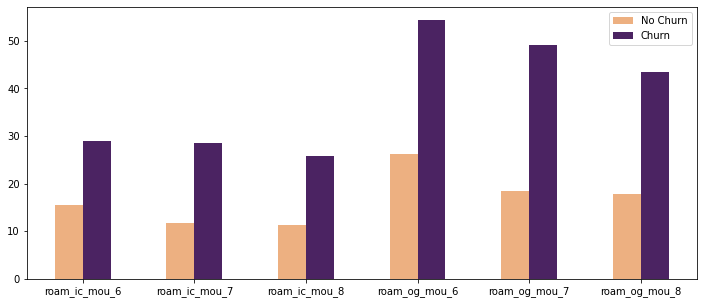

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,churn_probability
roam_ic_mou_6,1.0000,0.4927,0.3754,0.6349,0.3566,0.2290,0.0487
roam_ic_mou_7,0.4927,1.0000,0.6307,0.3004,0.5903,0.3489,0.0595
roam_ic_mou_8,0.3754,0.6307,1.0000,0.2111,0.3748,0.5106,0.0532
roam_og_mou_6,0.6349,0.3004,0.2111,1.0000,0.5283,0.3875,0.0645
roam_og_mou_7,0.3566,0.5903,0.3748,0.5283,1.0000,0.6228,0.0871
roam_og_mou_8,0.2290,0.3489,0.5106,0.3875,0.6228,1.0000,0.0676
churn_probability,0.0487,0.0595,0.0532,0.0645,0.0871,0.0676,1.0000


In [66]:
# Display barplot of MOU of incoming and outgoing calls for all months when customer was roaming
list_of_columns = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
                   'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Roaming outgoing calls have some impact and can see a slight decrease per month for customers who churned. While incoming calls have slight variation and during 7th month, it actually increase. Hence we will remove this MOU feature.

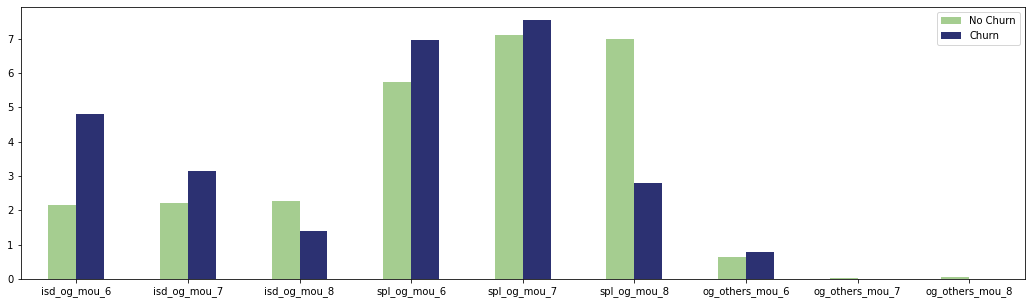

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,churn_probability
isd_og_mou_6,1.0000,0.9361,9.3251e-01,-0.0015,-0.0048,-0.0022,-0.0003,4.1053e-03,0.0019,0.0138
isd_og_mou_7,0.9361,1.0000,9.5466e-01,-0.0031,-0.0022,-0.0026,-0.0009,2.1225e-03,0.0014,0.0050
isd_og_mou_8,0.9325,0.9547,1.0000e+00,-0.0014,0.0039,0.0052,0.0010,9.7326e-06,0.0005,-0.0046
spl_og_mou_6,-0.0015,-0.0031,-1.3720e-03,1.0000,0.5769,0.3877,0.2170,6.3012e-03,0.0038,0.0177
spl_og_mou_7,-0.0048,-0.0022,3.9014e-03,0.5769,1.0000,0.5574,0.2045,4.2443e-03,-0.0013,0.0050
spl_og_mou_8,-0.0022,-0.0026,5.1858e-03,0.3877,0.5574,1.0000,0.1515,1.1027e-03,-0.0012,-0.0543
og_others_mou_6,-0.0003,-0.0009,9.9311e-04,0.2170,0.2045,0.1515,1.0000,4.3408e-02,0.1696,0.0163
og_others_mou_7,0.0041,0.0021,9.7326e-06,0.0063,0.0042,0.0011,0.0434,1.0000e+00,0.2442,-0.0053
og_others_mou_8,0.0019,0.0014,4.5930e-04,0.0038,-0.0013,-0.0012,0.1696,2.4425e-01,1.0000,-0.0057
churn_probability,0.0138,0.0050,-4.6365e-03,0.0177,0.0050,-0.0543,0.0163,-5.3206e-03,-0.0057,1.0000


In [67]:
# Display barplot of ISD, Special and Other feature outgoing MOU for all months
list_of_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
                   'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
                   'og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : ISD outgoing calls have some impact and can see a slight decrease per month for customers who churned. While special calls MOU increased during 7th month, hence we can't imply this as a good feature. Other calls MOU plays very less role in prediction, so we will remove these features as well.

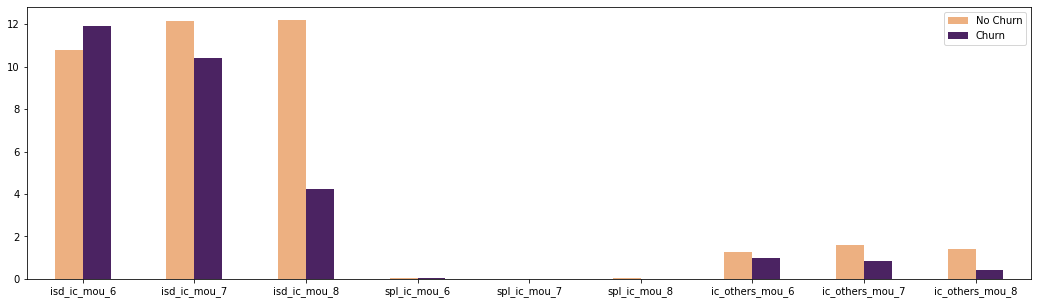

,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,churn_probability
isd_ic_mou_6,1.0000,0.7795,0.4784,0.0045,0.0014,-0.0122,0.1246,0.1708,0.0852,0.0040
isd_ic_mou_7,0.7795,1.0000,0.7051,0.0006,0.0020,-0.0017,0.1052,0.1777,0.1328,-0.0065
isd_ic_mou_8,0.4784,0.7051,1.0000,-0.0013,0.0078,0.0004,0.0874,0.1422,0.1496,-0.0305
spl_ic_mou_6,0.0045,0.0006,-0.0013,1.0000,0.5323,0.1340,0.0327,0.0309,0.0269,-0.0039
spl_ic_mou_7,0.0014,0.0020,0.0078,0.5323,1.0000,0.0547,0.0161,0.0133,0.0254,-0.0059
spl_ic_mou_8,-0.0122,-0.0017,0.0004,0.1340,0.0547,1.0000,0.0170,0.0235,0.0272,-0.0654
ic_others_mou_6,0.1246,0.1052,0.0874,0.0327,0.0161,0.0170,1.0000,0.7486,0.6710,-0.0042
ic_others_mou_7,0.1708,0.1777,0.1422,0.0309,0.0133,0.0235,0.7486,1.0000,0.7783,-0.0121
ic_others_mou_8,0.0852,0.1328,0.1496,0.0269,0.0254,0.0272,0.6710,0.7783,1.0000,-0.0183
churn_probability,0.0040,-0.0065,-0.0305,-0.0039,-0.0059,-0.0654,-0.0042,-0.0121,-0.0183,1.0000


In [68]:
# Display barplot of ISD, Special and Other feature incoming MOU for all months
list_of_columns = ['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
                   'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
                   'ic_others_mou_6', 'ic_others_mou_7', 'ic_others_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : ISD incoming calls have some impact and can see a slight decrease per month for customers who churned. While special calls MOU and other calls MOU decreased slightly, we will remove these features as numbers are very less for predicting churn probability.

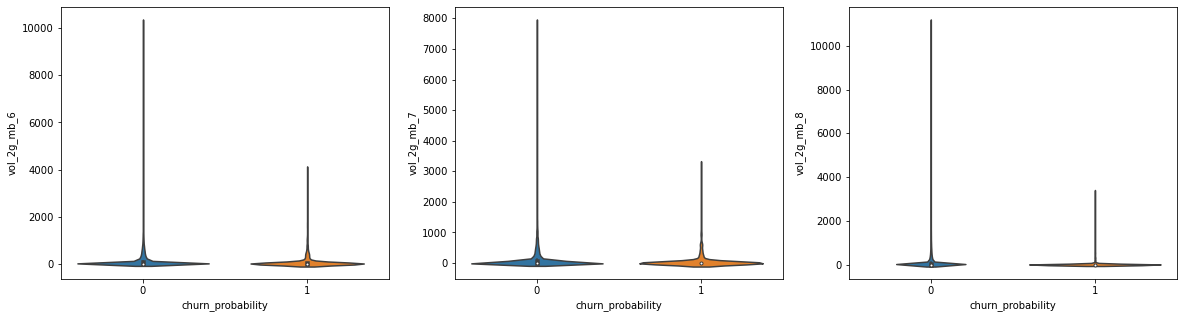

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,churn_probability
vol_2g_mb_6,1.0000,0.6776,0.5251,-0.0292
vol_2g_mb_7,0.6776,1.0000,0.6803,-0.0376
vol_2g_mb_8,0.5251,0.6803,1.0000,-0.0741
churn_probability,-0.0292,-0.0376,-0.0741,1.0000


In [69]:
# Plot boxplot of 2G Internet usage for all months
box_plot(tc_df, 'vol_2g_mb_')
list_of_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G internet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

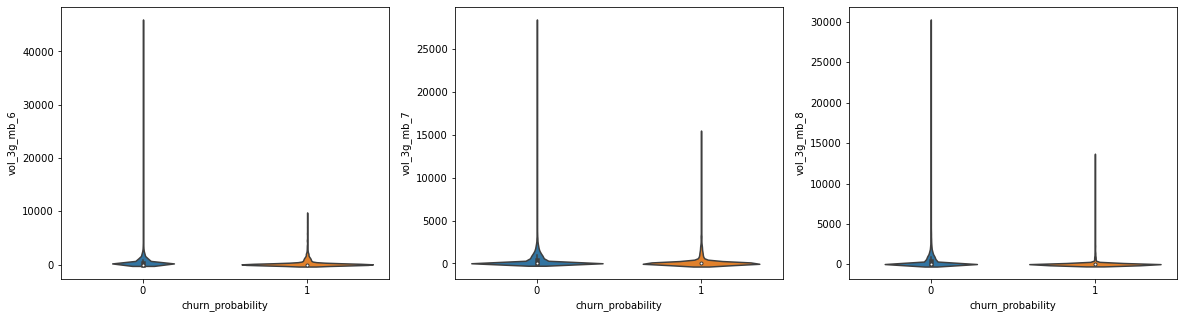

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,churn_probability
vol_3g_mb_6,1.0000,0.6981,0.6510,-0.0206
vol_3g_mb_7,0.6981,1.0000,0.7456,-0.0457
vol_3g_mb_8,0.6510,0.7456,1.0000,-0.0804
churn_probability,-0.0206,-0.0457,-0.0804,1.0000


In [70]:
# Plot boxplot of 3G Internet usage for all months
box_plot(tc_df, 'vol_3g_mb_')
list_of_columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G internet usage is negatively correlated.
* Spread is very less and gradually it is decreased, eventhough it increased slightly for month 7.

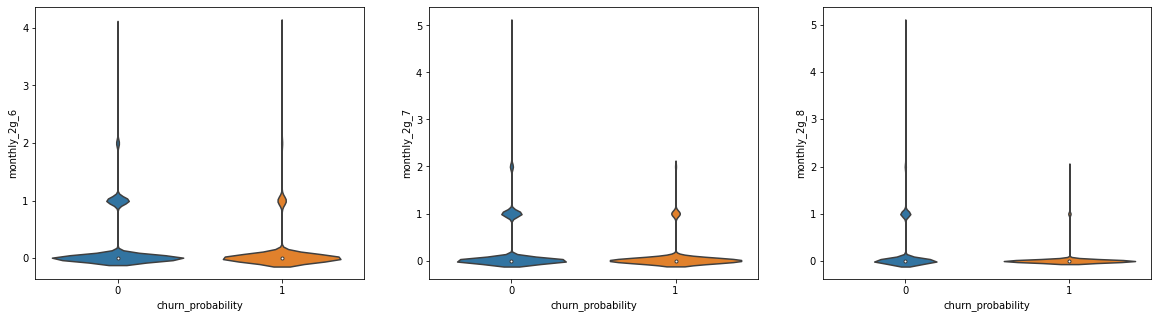

,monthly_2g_6,monthly_2g_7,monthly_2g_8,churn_probability
monthly_2g_6,1.0000,0.5591,0.5240,-0.0630
monthly_2g_7,0.5591,1.0000,0.5571,-0.0774
monthly_2g_8,0.5240,0.5571,1.0000,-0.1007
churn_probability,-0.0630,-0.0774,-0.1007,1.0000


In [71]:
# Plot boxplot of 2G Monthly usage for all months
box_plot(tc_df, 'monthly_2g_')
list_of_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G monthly usage is negatively correlated.
* Spread is very less and gradually it is decreased.

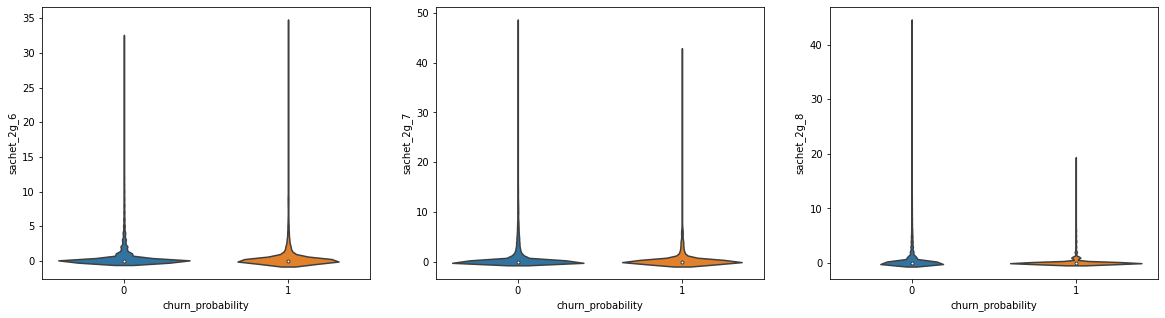

,sachet_2g_6,sachet_2g_7,sachet_2g_8,churn_probability
sachet_2g_6,1.0000,0.7578,0.6393,-0.0248
sachet_2g_7,0.7578,1.0000,0.7286,-0.0362
sachet_2g_8,0.6393,0.7286,1.0000,-0.0777
churn_probability,-0.0248,-0.0362,-0.0777,1.0000


In [72]:
# Plot boxplot of 2G Sachet usage for all months
box_plot(tc_df, 'sachet_2g_')
list_of_columns = ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G sachet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

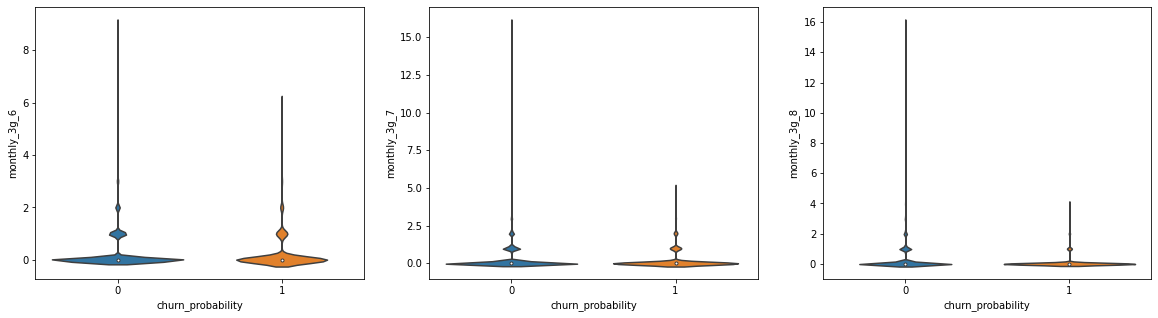

,monthly_3g_6,monthly_3g_7,monthly_3g_8,churn_probability
monthly_3g_6,1.0000,0.6112,0.5597,-0.0096
monthly_3g_7,0.6112,1.0000,0.6539,-0.0357
monthly_3g_8,0.5597,0.6539,1.0000,-0.0721
churn_probability,-0.0096,-0.0357,-0.0721,1.0000


In [73]:
# Plot boxplot of 3G Monthly usage for all months
box_plot(tc_df, 'monthly_3g_')
list_of_columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G monthly usage is negatively correlated.
* Spread is very less and gradually it is decreased.

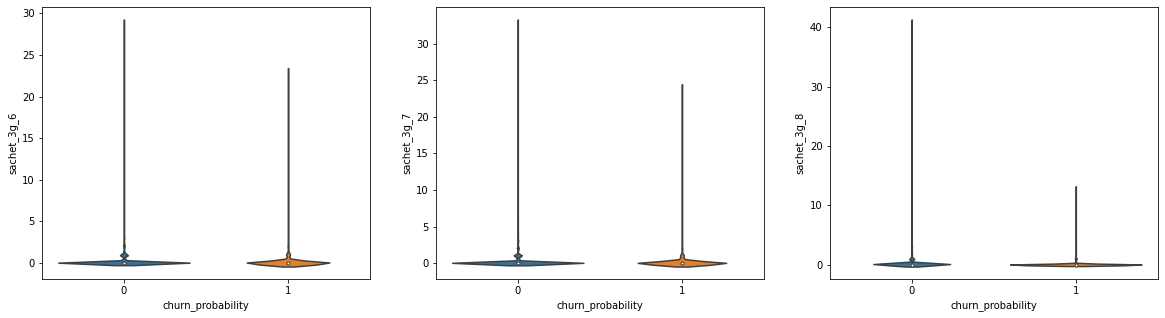

,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn_probability
sachet_3g_6,1.0000,0.6821,0.5345,-0.0036
sachet_3g_7,0.6821,1.0000,0.6965,-0.0102
sachet_3g_8,0.5345,0.6965,1.0000,-0.0355
churn_probability,-0.0036,-0.0102,-0.0355,1.0000


In [74]:
# Plot boxplot of 3G Sachet usage for all months
box_plot(tc_df, 'sachet_3g_')
list_of_columns = ['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G sachet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

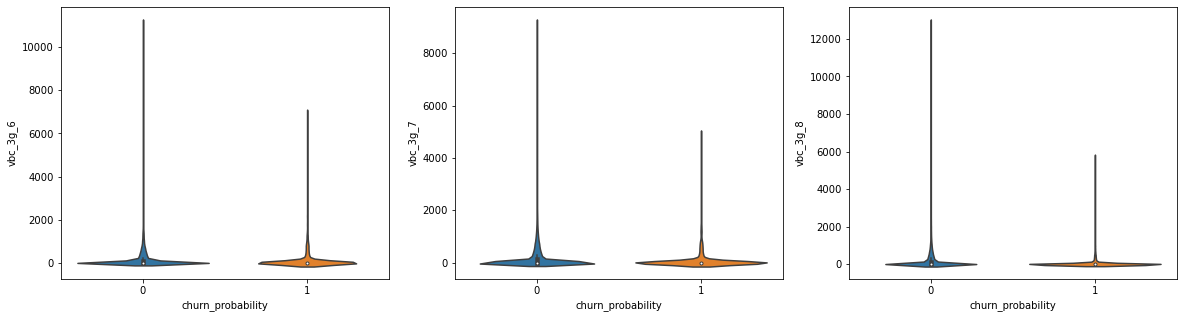

,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn_probability
vbc_3g_6,1.0000,0.6716,0.5814,-0.0316
vbc_3g_7,0.6716,1.0000,0.7007,-0.0545
vbc_3g_8,0.5814,0.7007,1.0000,-0.0885
churn_probability,-0.0316,-0.0545,-0.0885,1.0000


In [75]:
# Plot boxplot of Volume Based Cost for no specific scheme for all months
box_plot(tc_df, 'vbc_3g_')
list_of_columns = ['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* Features are negatively correlated.
* Spread is very less and gradually it is decreased.

### Derive New Feature

In [76]:
# Age on Network (AON), is a term used in telecom to indicate duration (days) for which the user has been a customer of the 
# particular operator / network.
# Calculate duration in months by dividing AON by 30 (average days in a month)
tc_df['duration'] = tc_df['aon'] / 30
# Check the percentile and min-max of duration column
tc_df['duration'].describe()

count    20995.0000
mean        41.4657
std         32.2092
min          6.0000
25%         15.7000
50%         29.6333
75%         62.1167
max        144.0333
Name: duration, dtype: float64

In [77]:
# We can see min-max value range and we will divide this feature into various buckets for better prediction
tc_df['aon_bucket'] = pd.cut(tc_df['duration'],
                             [0, 6, 12, 24, 60, 156],
                             labels = ['0-6 months', '6-12 months', '1-2 years', '2-5 years', '5+ years'])

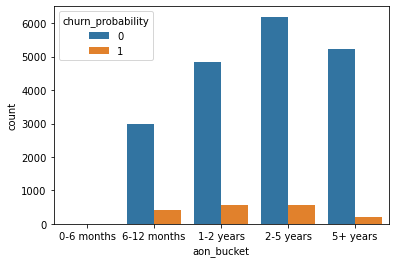

In [78]:
# Plot countplot of aon_bucket with churning probability.
sns.countplot(x='aon_bucket', hue='churn_probability', data=tc_df)
plt.show()

**Observation** - As seen in bar plot, we can see how **Loyal Customers** (continuing service for more than 5+ years) tends to churn less.

In [79]:
# Remove columns after analysis
list_of_columns = ['aon_bucket', 'duration']
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)

In [80]:
# Categorical type integer variables
list_of_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
for col in list_of_columns:
    print(tc_df[col].value_counts())

0    17737
1     2880
2      352
3       20
4        6
Name: monthly_2g_6, dtype: int64
0    17576
1     2964
2      425
3       26
4        3
5        1
Name: monthly_2g_7, dtype: int64
0    18065
1     2640
2      263
3       21
4        5
5        1
Name: monthly_2g_8, dtype: int64
0    17729
1     2428
2      574
3      167
4       59
5       16
6       10
7        8
8        2
9        2
Name: monthly_3g_6, dtype: int64
0     17736
1      2298
2       689
3       163
4        48
      ...  
8         4
9         3
16        1
14        1
10        1
Name: monthly_3g_7, Length: 13, dtype: int64
0     17955
1      2167
2       605
3       164
4        62
      ...  
7         5
8         3
9         2
16        1
10        1
Name: monthly_3g_8, Length: 12, dtype: int64


In [81]:
# Get column location and save it in col_index. This will be used in SMOTENC.
col_index = []

for col in list_of_columns:
    col_index.append(tc_df.columns.get_loc(col))
    print('Location of Column {0} is {1}'.format(col, tc_df.columns.get_loc(col)))

Location of Column monthly_2g_6 is 111
Location of Column monthly_2g_7 is 112
Location of Column monthly_2g_8 is 113
Location of Column monthly_3g_6 is 117
Location of Column monthly_3g_7 is 118
Location of Column monthly_3g_8 is 119


In [82]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(tc_df.shape[0], tc_df.shape[1]))

The data set now have 20995 rows and 128 columns


In [83]:
# Check the first five rows
tc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.0,0.0,7.33,8.64,2.46,0.00,0.48,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.00,0.00,0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,154.0,0.0,154.0,260.42,0.00,354.35,0.0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.00,0.00,0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.0,0.36,252.48,257.74,129.73,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0

In [84]:
# Check the percentile and min-max of dataframe
tc_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability
count,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000,20995.0000
mean,576.5413,576.6195,523.0794,277.7010,284.4472,248.5593,396.5379,398.3396,352.3705,16.5824,13.1986,12.5518,28.5434,21.0665,19.9672,88.4366,89.7048,81.7428,171.1003,169.2705,157.1983,6.6504,6.7498,6.2089,1.5431,1.8098,1.6579,266.1958,265.7338,245.1582,177.8790,186.3178,158.9666,192.7731,200.9803,168.7064,1.8978,1.8169,1.6616,372.5539,389.1190,329.3381,2.3830,2.2811,2.1824,5.8324,7.1489,6.6406,0.6528,0.0305,0.0584,647.6273,664.3215,583.3856,66.8587,67.7511,64.4611,153.6729,153.9966,148.2602,15.7885,16.9012,15.1496,236.3299,238.6588,227.8804,15.2357,15.9112,14.5297,30.3457,31.7900,28.5528,2.9144,2.9542,2.6088,48.4995,50.6593,45.6948,297.0073,302.9037,286.4418,0.0639,0.0179,0.0269,10.878,12.0160,11.5249,1

### Train-Validation Split

In [85]:
# Splitting data into train and validation set 80:20
np.random.seed(0)
df_train, df_test = train_test_split(tc_df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [86]:
# Check the size of train and test dataframe
print("Train dataframe have {0} Rows and {1} Columns".format(df_train.shape[0], df_train.shape[1]))
print("Test dataframe have {0} Rows and {1} Columns".format(df_test.shape[0], df_test.shape[1]))

Train dataframe have 16796 Rows and 128 Columns
Test dataframe have 4199 Rows and 128 Columns


In [87]:
# Pop 'churn_probability' column to get our target variable (y) and store the rest of the variables in another dataframe (X)
# for train and test dataset respectively
y_train = df_train.pop('churn_probability')
X_train = df_train
y_test = df_test.pop('churn_probability')
X_test = df_test

In [88]:
# Calculate churn probability class percentage in train and test
train_ratio = round(100*(y_train.mean()),2)
test_ratio = round(100*(y_test.mean()),2)
print('The Train dataset have only {0} % churned class'.format(train_ratio))
print('The Test dataset have only {0} % churned class'.format(test_ratio))

The Train dataset have only 8.6 % churned class
The Test dataset have only 7.48 % churned class


### Fix Class Imbalance Issue

In [89]:
# Instantiate SMOTENC and provide categorical type vars index as argument
smotenc = SMOTENC(col_index, random_state = 42)

In [90]:
# Fittign SMOTE to the train set
X_train, y_train = smotenc.fit_resample(X_train, y_train)

In [91]:
# Check the size of X_train
print("X_train dataframe have {0} Rows and {1} Columns".format(X_train.shape[0], X_train.shape[1]))

X_train dataframe have 30702 Rows and 127 Columns


In [92]:
# Calculate churn probability class percentage in train after fixing Class Imbalance
train_im_ratio = round(100*(y_train.mean()),2)
print('The Train dataset have {0} % churned class'.format(train_im_ratio))

The Train dataset have 50.0 % churned class


**Observation** : We now have oversampled to fix class imbalance issue and we got 50% churned class!

### Scaling Features

In [93]:
# Instantiate the Scaler
scaler = StandardScaler()

In [94]:
# Use fit to learn scaler parameters (max, min) of train dataset and apply it to transform the dataset
list_of_columns = X_train.columns
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])

# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

In [95]:
# See first 5 rows of X_train dataframe
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,-0.3576,-0.1562,-0.7244,0.2399,-0.0292,-0.3803,0.3146,1.1104,-0.4397,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,-0.3011,-0.3129,-0.2794,-0.3719,0.1372,-0.3722,-0.2973,-0.2826,-0.2547,1.6938,-0.2025,-0.2198,-0.4440,-0.1182,-0.4200,0.4136,0.1267,-0.2608,0.5416,1.2242,-0.2520,-0.1440,-0.1351,-0.1209,0.6601,0.9168,-0.3405,-0.0668,-0.0541,-0.0386,0.7647,-0.3302,-0.2792,-0.3584,-0.0145,-0.0138,0.4364,0.7868,-0.5026,-0.3929,-0.2496,-0.3260,-0.4665,-0.2899,-0.5036,-0.3116,-0.2953,-0.2615,-0.5552,-0.3680,-0.5419,-0.1660,-0.1648,-0.1736,-0.2858,-0.1115,-0.2453,-0.1369,-0.1435,-0.1081,-0.3176,-0.1887,-0.2819,-0.6355,-0.4240,-0.5838,-0.3585,-0.1574,2.7080,-0.2002,-0.1909,-0.1391,-0.0623,-0.0888,-0.0756,-0.4721,-0.4636,-0.3047,-0.3189,-0.1340,-0.7481,-0.2920,-0.2580,-0.7874,0.1175,0.2154,-0.5312,-0.5597,-0.5380,-0.4440,-0.3245,-0.3184,-0.2479,-0.3308,-0.3251,-0.2819,-0.3009,-0.3062,-0.2741,-0.3105,-0.3067,-0.2785,-0.3257,-0.3085,-0.27,-0.1825,-0.1692,-0.1329,0.5491,-0.3036,-0.3461,-0.3314
1,-0.5346,-0.4649,-0.2538,-0.4672,-0.5284,-0.4162,0.0188,-0.2405,-0.1259,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,-0.1145,-0.1908,-0.1865,1.2942,0.5233,0.3022,0.1043,0.6128,1.2864,-0.2518,0.3721,-0.2198,0.7913,0.2584,0.1448,-0.4246,-0.4626,-0.3497,-0.5098,-0.4843,-0.3443,-0.1440,-0.1351,0.8851,-0.6498,-0.6514,-0.4446,-0.0668,-0.0541,-0.0386,-0.3518,-0.0808,-0.1908,-0.3584,-0.0145,-0.0138,-0.2705,-0.4973,-0.3179,0.5056,-0.0374,0.0119,1.4985,1.0703,-0.0253,0.6360,0.3117,0.1260,1.3747,0.7761,0.0065,-0.1629,-0.1774,-0.1736,-0.3351,-0.2819,-0.2438,1.8911,-0.1435,-0.0972,-0.0808,-0.3196,-0.2792,1.1145,0.5136,-0.1205,-0.3585,-0.1574,-0.1787,-0.2002,-0.1909,-0.1391,-0.0847,0.8412,-0.0756,-0.6798,-0.2428,-0.1827,-0.5400,-0.3196,-0.3834,-0.2452,-0.2580,0.0379,-0.4821,-0.6946,0.4953,-0.5597,-0.0122,-0.4440,-0.3245,-0.0560,-0.2479,-0.3308,-0.3251,-0.2819,-0.3009,-0.3062,-0.2741,-0.3105,1.6237,-0.2785,-0.3257,-0.3085,-0.27,-0.1825,-0.1692,-0.1329,2.1380,-0.3036,-0.3461,-0.3314
2,0.9370,-1.1715,-0.8065,-0.2051,-0.5861,-0.4578,0.9438,-0.7594,-0.6024,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,-0.2978,-0.3382,-0.2794,-0.2863,-0.6224,

In [96]:
# Get statistics of X_train dataframe
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04,3.0702e+04
mean,2.6909e-16,1.1910e-16,-3.5843e-15,1.2024e-15,-2.3432e-18,9.2117e-15,4.4758e-16,-2.8248e-16,3.5629e-15,2.6644e-15,5.6970e-15,4.3307e-15,5.7918e-15,-1.0933e-14,-5.8365e-15,1.2728e-15,-5.0702e-15,7.0245e-15,3.4450e-15,5.6941e-15,1.6449e-14,7.4426e-15,1.2363e-14,-2.5662e-14,-1.7536e-15,1.1411e-15,1.0468e-14,-2.5644e-15,4.1394e-15,1.5417e-14,-1.5466e-15,5.4429e-16,9.9145e-15,-3.9274e-15,1.8584e-15,1.7058e-14,5.8207e-15,1.3186e-14,-2.0371e-14,-5.4602e-15,-2.4008e-15,1.1424e-14,-8.4032e-16,-1.3036e-15,3.3126e-15,2.7395e-16,1.9953e-16,3.3902e-16,-7.5625e-15,-8.1944e-16,4.0939e-15,-1.1689e-15,3.0119e-16,1.9113e-14,-3.3956e-16,1.6653e-15,-1.1158e-14,-3.8488e-16,-5.8405e-15,1.9990e-14,2.3267e-15,1.1415e-14,2.7467e-14,8.2835e-17,5.7350e-1

In [97]:
# See first 5 rows of X_test dataframe
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
52306,0.0725,-0.3048,0.2583,0.3105,-0.1636,0.5101,0.6138,0.3843,0.7106,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,0.0354,0.0450,0.2488,0.3938,0.5157,0.8073,-0.2692,-0.2480,-0.2357,-0.2518,-0.2025,-0.2198,0.2684,0.3514,0.6504,0.3476,-0.1689,0.4892,0.5563,0.2511,0.4810,-0.144,-0.1351,-0.1209,0.6248,0.0514,0.6387,-0.0668,-0.0541,-0.0386,-0.3518,-0.3302,-0.2792,-0.3584,-0.0145,-0.0138,0.6992,0.1897,0.8467,-0.3099,-0.3583,0.0026,0.7146,1.2730,0.9161,-0.3036,-0.2897,-0.2113,0.3105,0.6671,0.5980,1.7460,1.6203,1.5551,0.3728,1.5562,2.7767,0.0773,0.0536,0.0053,1.2543,2.0294,2.8037,2.2782,2.4890,3.0268,1.3414,-0.1574,4.7864,9.1097,5.5164,7.0148,1.8601,2.1409,5.8642,0.0474,-0.3532,0.9154,0.0479,-0.3250,0.3530,-0.5788,-0.5788,-0.2986,-0.2798,-0.2017,0.0768,-0.5597,-0.5380,-0.4440,-0.3245,-0.3184,-0.2479,-0.3308,-0.3251,-0.2819,-0.3009,-0.3062,-0.2741,-0.3105,-0.3067,-0.2785,-0.3257,-0.3085,-0.2700,-0.1825,-0.1692,-0.1329,2.0578,-0.3036,-0.3461,-0.3314
51501,0.5778,0.2323,0.4576,-0.0373,-0.2599,0.0265,0.0129,-0.3763,0.0245,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,1.1476,0.4894,0.7867,1.2165,0.1504,0.6047,-0.2394,0.0374,-0.2287,-0.2467,0.1618,-0.2198,1.4906,0.4015,0.8523,-0.4946,-0.4601,-0.3414,-0.4735,-0.4427,-0.2318,-0.144,-0.1351,-0.1209,-0.6728,-0.6214,-0.3816,-0.0668,-0.0372,-0.0386,-0.2254,-0.0426,-0.2792,-0.3584,-0.0145,-0.0138,0.0269,-0.4039,0.0731,0.8309,0.7760,0.5427,-0.2120,-0.2191,-0.0739,-0.1295,0.6812,0.3144,0.2270,0.3275,0.2607,-0.2299,-0.1615,-0.1656,-0.3351,-0.1883,-0.1453,-0.1186,-0.0917,0.1455,-0.3865,-0.2366,-0.1703,0.1171,0.3035,0.3813,0.9448,52.8280,-0.1787,-0.1732,-0.1909,-0.1391,2.3411,3.2465,6.2957,-0.0565,-0.4636,-0.0607,0.5007,0.2264,0.6274,-0.0930,0.1969,0.4695,0.1753,0.1395,0.3690,0.2519,1.3130,0.7394,2.3578,6.1487,9.5504,-0.3308,-0.3251,-0.2819,2.6109,5.3309,2.9222,-0.3105,-0.3067,-0.2785,-0.3257,-0.3085,-0.2700,-0.1825,-0.1692,-0.1329,1.0245,-0.3036,-0.3461,-0.3314
50711,0.3317,0.3129,1.1891,1.6280,0.9832,1.9965,-0.3088,0.2351,0.8171,-0.2149,-0.1998,-0.2063,-0.2647,-0.2686,-0.2291,0.1959,0.3310,0.2251,0.0783,0.2657,1.5856,-0.2973,-0.2071,-0.2287,-0.1656,-0.2025,-0.2198,0.1561,0.3

In [98]:
# Get statistics of X_test dataframe
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
count,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000,4199.0000
mean,-0.0883,0.0513,0.2966,-0.1037,-0.0197,0.1695,-0.0727,0.0258,0.2588,-0.0453,-0.0443,-0.0462,-0.0498,-0.0711,-0.0362,0.0681,0.1170,0.1767,0.0840,0.1600,0.2907,0.0713,0.0713,0.1125,0.0182,0.0005,0.0876,0.1006,0.1805,0.2980,-0.1348,-0.0623,0.1119,-0.1092,-0.0391,0.1435,0.0567,0.0652,0.0788,-0.1682,-0.0689,0.1695,-0.0312,-0.0139,0.0006,-0.0356,-0.0124,0.1090,-0.0550,-0.0051,0.0057,-0.1167,0.0145,0.2907,0.0982,0.1512,0.1913,0.0901,0.1552,0.2793,0.0796,0.0792,0.1401,0.1205,0.1927,0.3050,-0.0095,0.0090,0.0905,-0.0034,0.0430,0.1254,0.0411,0.0446,0.0654,-0.0023,0.0415,0.1465,0.1116,0.1864,0.3201,-0.0056,0.0317,0.1557,0.0575,0.0465,0.0561,-0.0033,0.0078,0.0271,-0.0709,0.0581,0.3192,-0.0883,0.0589,0.2956,0.0145,0.0701,0.2479,-0.0001,0.0729,0.1949,0.0687,0.1528,0.2686,0.0573,0.1155,0.1808,0.0316,0.1146,0.1765,0.2046,0.2060,0.1986,0.0926,0.1141,0.2175,0.0566,0.1289

## Modeling

In [99]:
# Function to calculate different metrics
def calculate_metrics(y, y_pred, confusion):
    # Create an empty list
    metric = []
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Accuracy = accuracy_score(y, y_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    
    metric.append(Accuracy)
    metric.append(Sensitivity)
    metric.append(Specificity)
    
    print('Accuracy : ', Accuracy)
    print('Sensitivity : ', Sensitivity)
    print('Specificity : ', Specificity)
    
    return metric

### Model with PCA

In [100]:
# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [101]:
# Principal components
pca.components_

array([[ 9.26882011e-02,  1.43142052e-01,  1.67949383e-01, ...,
         3.85938981e-02,  2.52118320e-02,  1.33034011e-02],
       [ 8.48581005e-02,  9.03665181e-02,  4.22373209e-02, ...,
        -1.17163922e-01, -1.26241301e-01, -1.17607187e-01],
       [ 1.02308077e-01,  1.79638449e-01,  1.96182529e-01, ...,
         1.60570188e-01,  1.58018407e-01,  1.43398740e-01],
       ...,
       [ 1.68236547e-07,  5.32041863e-07,  9.90096199e-08, ...,
         1.15229968e-07,  6.67948000e-08,  5.57689021e-08],
       [-4.08946835e-07, -1.34073122e-07, -7.13120912e-07, ...,
        -3.78157187e-08,  1.07641579e-07, -1.68493864e-08],
       [-3.66321240e-07,  3.04450170e-07,  1.29808161e-07, ...,
        -3.09321139e-08,  4.49713845e-08, -1.77440775e-08]])

In [102]:
# Explained variance ratio for each component
pca.explained_variance_ratio_

array([1.04709157e-01, 8.66798371e-02, 5.87146112e-02, 4.32410884e-02,
       4.07739118e-02, 3.38979877e-02, 3.17699736e-02, 3.03624038e-02,
       2.61176997e-02, 2.44728803e-02, 2.39316920e-02, 2.16430217e-02,
       2.08513189e-02, 2.07627363e-02, 1.93614993e-02, 1.72507001e-02,
       1.54618169e-02, 1.52889767e-02, 1.50960501e-02, 1.38791718e-02,
       1.33497168e-02, 1.32188708e-02, 1.22830535e-02, 1.18623023e-02,
       1.14839002e-02, 1.02065728e-02, 9.93933456e-03, 9.51456097e-03,
       9.17837272e-03, 8.46099420e-03, 8.20311288e-03, 8.02790439e-03,
       7.74257850e-03, 7.49318843e-03, 7.37007776e-03, 7.28758428e-03,
       7.26118992e-03, 6.99797929e-03, 6.58866256e-03, 6.41846988e-03,
       6.19038604e-03, 5.86926122e-03, 5.41477366e-03, 5.13092330e-03,
       4.98351194e-03, 4.49560504e-03, 4.39795535e-03, 4.28417963e-03,
       4.16587130e-03, 4.11523701e-03, 4.00116353e-03, 3.91178095e-03,
       3.78856495e-03, 3.74445811e-03, 3.66978495e-03, 3.41836282e-03,
      

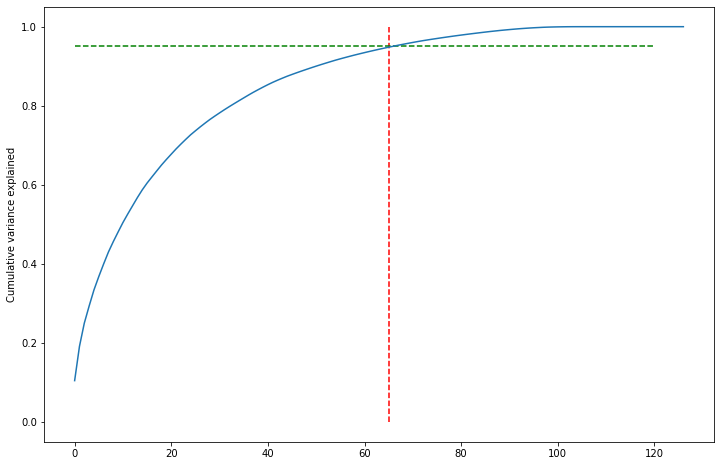

In [103]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

**Observation** - We can see that **65 components** explain amost more than 95 % variance of the data. So, we will perform PCA with 65 components.

#### Performing PCA with 65 components

In [104]:
# Instantiate PCA with 65 components
pca_final = IncrementalPCA(n_components=65)

In [105]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

In [106]:
# Check the size of X_train_pca
print("X_train PCA dataframe have {0} Rows and {1} Columns".format(X_train_pca.shape[0], X_train_pca.shape[1]))

X_train PCA dataframe have 30702 Rows and 65 Columns


In [107]:
# Check the size of X_test_pca
print("X_test PCA dataframe have {0} Rows and {1} Columns".format(X_test_pca.shape[0], X_test_pca.shape[1]))

X_test PCA dataframe have 4199 Rows and 65 Columns


### Logistic Regression With PCA

In [108]:
# Inverse of regularization strength (C) : smaller values specify stronger regularization.
# Hyperparameters for Tuning
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity
log_pca_model = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring = 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
log_pca_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [109]:
# Printing the best hyperparameter alpha
print('Best C : ', log_pca_model.best_params_['C'])
print('Best Score', log_pca_model.best_score_)

Best C :  1
Best Score 0.867420307894369


In [110]:
# Results of grid search CV
cv_results = pd.DataFrame(log_pca_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0498,0.0115,0.0041,0.0059,0.001,{'C': 0.001},0.8675,0.8638,0.8671,0.8639,0.8623,0.8649,0.0020,7,0.8653,0.8652,0.8652,0.8648,0.8615,0.8644,0.0015
1,0.0880,0.0201,0.0049,0.0065,0.01,{'C': 0.01},0.8688,0.8661,0.8658,0.8652,0.8607,0.8653,0.0026,6,0.8684,0.8680,0.8673,0.8669,0.8637,0.8669,0.0017
2,0.1320,0.0216,0.0000,0.0000,0.1,{'C': 0.1},0.8698,0.8684,0.8668,0.8675,0.8619,0.8669,0.0027,2,0.8694,0.8675,0.8678,0.8671,0.8642,0.8672,0.0017
3,0.1682,0.0137,0.0000,0.0000,1,{'C': 1},0.8698,0.8701,0.8684,0.8669,0.8619,0.8674,0.0030,1,0.8702,0.8678,0.8680,0.8672,0.8640,0.8674,0.0020
4,0.1533,0.0112,0.0000,0.0000,10,{'C': 10},0.8704,0.8684,0.8668,0.8659,0.8616,0.8666,0.0029,4,0.8699,0.8670,0.8692,0.8677,0.8650,0.8678,0.0017
5,0.1674,0.0096,0.0032,0.0065,100,{'C': 100},0.8704,0.8691,0.8658,0.8659,0.8616,0.8666,0.0031,5,0.8698,0.8674,0.8690,0.8681,0.8648,0.8678,0.0017
6,0.1613,0.0193,0.0031,0.0063,1000,{'C': 1000},0.8704,0.8691,0.8658,0.8665,0.8619,0.8668,0.0029,3,0.8698,0.8674,0.8691,0.8681,0.8640,0.8677,0.0020


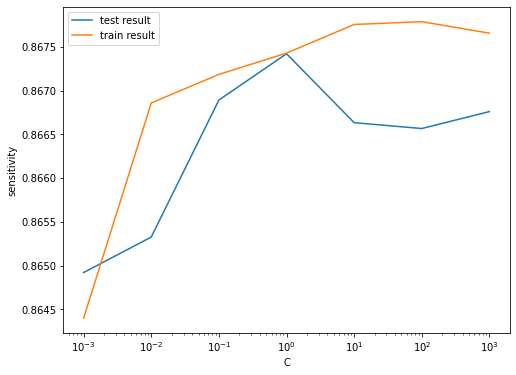

In [111]:
# Plotting mean test and train scores with C
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

**Observation** - Train and Test accuracy increases with C and are almost similar when C = 1. Afterwards, test reduces drastically.

In [112]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [113]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12650  2701]
 [ 2035 13316]]


In [114]:
# Calculate metrics
metric_log_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8457429483421276
Sensitivity :  0.8674353462315159
Specificity :  0.8240505504527392


In [115]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [116]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3206  679]
 [  65  249]]


In [117]:
# Calculate metrics
metric_log_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8228149559418909
Sensitivity :  0.7929936305732485
Specificity :  0.8252252252252252


### Decision Tree Classifier With PCA

In [118]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

dt_pca_model = GridSearchCV(estimator = dtree, 
                           param_grid = params, 
                           scoring= 'recall',
                           cv = folds, 
                           verbose = 1)

# Fit the model on training data
dt_pca_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [119]:
# Printing the best hyperparameter alpha
print('Best Score : ', dt_pca_model.best_score_)
print('Best Param Estimator', dt_pca_model.best_estimator_)

Best Score :  0.8500179216279976
Best Param Estimator DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


In [120]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13204  2147]
 [ 1958 13393]]


In [121]:
# Calculate metrics
metric_dt_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8662953553514429
Sensitivity :  0.8724513061038369
Specificity :  0.8601394045990489


In [122]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3227  658]
 [ 101  213]]


In [123]:
# Calculate metrics
metric_dt_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8192426768278162
Sensitivity :  0.678343949044586
Specificity :  0.8306306306306306


### Random Forest Tree With PCA

In [124]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [10, 20, 50], 
    'max_features': [10, 20]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
rf_pca_model = GridSearchCV(estimator = rf, 
                           param_grid = params, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           scoring= 'recall',
                           return_train_score=True)

# Fit the model
rf_pca_model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [10, 20, 50]},
             return_train_score=True, scoring='recall', verbose=1)

In [125]:
# Printing the best hyperparameter alpha
print('Best Score : ', rf_pca_model.best_score_)
print('Best Param Estimator', rf_pca_model.best_estimator_)

Best Score :  0.850887231063208
Best Param Estimator RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=50, random_state=42)


In [126]:
# Predictions on the train set
y_train_pred = rf_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13945  1406]
 [ 1749 13602]]


In [127]:
# Calculate metrics
metric_rf_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8972379649534232
Sensitivity :  0.8860660543287082
Specificity :  0.9084098755781382


In [128]:
# Prediction on the test set
y_test_pred = rf_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3466  419]
 [ 102  212]]


In [129]:
# Calculate metrics
metric_rf_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.875922838771136
Sensitivity :  0.6751592356687898
Specificity :  0.8921492921492922


### Adaboost with PCA

In [130]:
# Hyperparameters for Tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [1, 2, 5, 10]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
ab = AdaBoostClassifier(random_state=42)

# Instantiate the grid search model
adaboost_pca_model = GridSearchCV(estimator=ab,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the model
adaboost_pca_model.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [131]:
# Predictions on the train and test set
y_train_pred = adaboost_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13285  2066]
 [ 1766 13585]]


In [132]:
# Calculate metrics
metric_ad_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.875187284216012
Sensitivity :  0.8849586346166374
Specificity :  0.8654159338153866


In [133]:
# Pedict on test data
y_test_pred = adaboost_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3338  547]
 [  88  226]]


In [134]:
# Calculate metrics
metric_ad_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8487735175041676
Sensitivity :  0.7197452229299363
Specificity :  0.8592020592020592


### Gradient Boosting with PCA

In [135]:
# Instatiate Gradient Boostig (GB)
gb_pca_model = GradientBoostingClassifier(random_state=42) # default 
gb_pca_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [136]:
# Fit the model to our train and target
gb_pca_model.fit(X_train_pca, y_train)

# Predictions on the train set
y_train_pred = gb_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13552  1799]
 [ 1795 13556]]


In [137]:
# Calculate metrics
metric_gb_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8829392222005081
Sensitivity :  0.8830695068725164
Specificity :  0.8828089375284998


In [138]:
# Predictions on the test set
y_test_pred = gb_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3391  494]
 [  80  234]]


In [139]:
# Calculate metrics
metric_gb_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8633007859014051
Sensitivity :  0.7452229299363057
Specificity :  0.8728442728442728


### Extreme Gradient Boosting with PCA

In [140]:
# Instatiate Extream Gradient Boostig (XGB)
xgb_pca_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_pca_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [141]:
# Fit the model to our train and target
xgb_pca_model.fit(X_train_pca, y_train)

# Predictions on the train set
y_train_pred = xgb_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[19:48:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15285    66]
 [   11 15340]]


In [142]:
# Calculate metrics
metric_xgb_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9974920200638395
Sensitivity :  0.9992834343039542
Specificity :  0.9957006058237249


In [143]:
# Predictions on the test set
y_test_pred = xgb_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3616  269]
 [ 132  182]]


In [144]:
# Calculate metrics
metric_xgb_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.9045010716837342
Sensitivity :  0.5796178343949044
Specificity :  0.9307593307593307


## Model without PCA

### Logistic regression without PCA

In [145]:
# Function to calculate the VIFs for each model
def generate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [146]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train)

# Logistic regression model
logm1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30702
Model:                            GLM   Df Residuals:                    30574
Model Family:                Binomial   Df Model:                          127
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Dec 2022   Deviance:                       20546.
Time:                        19:48:44   Pearson chi2:                 2.14e+05
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6416      0.074     -8.727      0.000      -0.786      -0.498
arpu_6                 0.2011      0.086      2.349      0.019       0.033       0.369
arpu_7                 0.4468      0.093      4.797      0.000       0.264       0.629
arpu_8                 0.7087      0.101      7.023      0.000       0.511       0.907
onnet_mou_6           -0.6728      1.126     -0.597      0.550      -2.880       1.535
onnet_mou_7           -5.1803      1.620     -3.197      0.001      -8.356      -2.005
onnet_mou_8            0.4782      1.336      0.358      0.720      -2.140       3.097
offnet_mou_6           0.2904      1.098      0.264      0.791      -1.862       2.442
offnet_mou_7          -4.3886      1.550     -2.831      0.005      -7.427      -1.350
offnet_mou_8          -1.9298      1.295     -1.491      0.136      -4.467       0.608
roam_ic_mou_6          0.1145      0.035      3.294      0.001       0.046       0.183
roam_ic_mou_7          0.0813      0.037      2.215      0.027       0.009       0.153
roam_ic_mou_8         -0.1134      0.027     -4.221      0.000      -0.166      -0.061
roam_og_mou_6          0.0136      0.278      0.049      0.961      -0.532       0.559
roam_og_mou_7          1.0882      0.346      3.147      0.002       0.410       1.766
roam_og_mou_8          0.3656      0.369      0.991      0.322      -0.357       1.089
loc_og_t2t_mou_6    3410.1116    755.501      4.514      0.000    1929.357    4890.867
loc_og_t2t_mou_7     225.4596    722.732      0.312      0.755   -1191.070    1641.989
loc_og_t2t_mou_8    7708.4453    684.279     11.265      0.000    6367.284    9049.607
loc_og_t2m_mou_6    3704.8437    820.919      4.513      0.000    2095.872    5313.815
loc_og_t2m_mou_7     239.3925    768.449      0.312      0.755   -1266.741    1745.526
loc_og_t2m_mou_8    7953.4418    705.950     11.266      0.000    6569.806    9337.078
loc_og_t2f_mou_6     281.5115     62.360      4.514      0.000     159.287     403.736
loc_og_t2f_mou_7      19.9968     64.248      0.311      0.756    -105.928     145.921
loc_og_t2f_mou_8     665.2263     59.045     11.266      0.000     549.501     780.952
loc_og_t2c_mou_6      -0.1018      0.025     -4.012      0.000      -0.151      -0.052
loc_og_t2c_mou_7       0.2166      0.030      7.208      0.000       0.158       0.275
loc_og_t2c_mou_8       0.0608      0.028      2.159      0.031       0.006       0.116
loc_og_mou_6       -6390.3255   1534.547     -4.164      0.000   -9397.982   -3382.669
loc_og_mou_7        -222.5983   1531.412     -0.145      0.884   -3224.111    2778.915
loc_og_mou_8       -4571.3596   1448.849     -3.155      0.002   -7411.052   -1731.667
std_og_t2t_mou_6   -5127.8849   2113.430     -2.426      0.015   -9270.131    -985.638
std_og_t2t_mou_7   -2558.5970   2072.1

In [147]:
# Instantiate Logistic Regrssion
lm = LogisticRegression(random_state=42)

# Intantiate RFE with 15 columns
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [148]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')


In [149]:
# Adding constant to X_train
# Selecting only RFE supported columns
X_train_sm_2 = sm.add_constant(X_train[rfe_cols])

# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
logm2 = logm2.fit()

# Summary
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30702
Model:                            GLM   Df Residuals:                    30686
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Dec 2022   Deviance:                       23048.
Time:                        19:49:13   Pearson chi2:                 6.17e+06
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8632      0.077    -11.205      0.000      -1.014      -0.712
arpu_7                 0.4096      0.025     16.285      0.000       0.360       0.459
offnet_mou_8          -1.7204      0.085    -20.226      0.000      -1.887      -1.554
roam_og_mou_8          0.4554      0.026     17.600      0.000       0.405       0.506
std_og_t2m_mou_8       1.2607      0.074     17.132      0.000       1.117       1.405
og_others_mou_8      -12.2212      5.283     -2.314      0.021     -22.575      -1.868
loc_ic_t2m_mou_7       0.6656      0.038     17.575      0.000       0.591       0.740
loc_ic_mou_8          -1.9493      0.065    -29.934      0.000      -2.077      -1.822
std_ic_mou_8          -0.4267      0.034    -12.395      0.000      -0.494      -0.359
spl_ic_mou_8          -0.5054      0.033    -15.502      0.000      -0.569      -0.441
total_rech_num_8      -0.6187      0.025    -25.109      0.000      -0.667      -0.570
last_day_rch_amt_8    -0.5149      0.025    -20.792      0.000      -0.563      -0.466
monthly_2g_7          -0.5219      0.028    -18.749      0.000      -0.576      -0.467
monthly_2g_8          -1.0768      0.064    -16.953      0.000      -1.201      -0.952
sachet_2g_8           -0.5270      0.030    -17.741      0.000      -0.585      -0.469
monthly_3g_8          -0.5112      0.023    -22.238      0.000      -0.556      -0.466
======================================================================================
"""

In [150]:
# Generate VIF
generate_vif(X_train[rfe_cols])

,Features,VIF
1,offnet_mou_8,6.55
3,std_og_t2m_mou_8,5.52
6,loc_ic_mou_8,2.34
5,loc_ic_t2m_mou_7,2.06
12,monthly_2g_8,1.53
...,...,...
2,roam_og_mou_8,1.15
14,monthly_3g_8,1.07
7,std_ic_mou_8,1.06
8,spl_ic_mou_8,1.03


**Observaton**
* p-value of features is less (p-value < 0.05)
* offnet_mou_8 and std_og_t2m_mou_8 features have VIF > 5, means multi-collinearity

We will remove offnet_mou_8 feature and analyze the model again

In [151]:
# Remove offnet_mou_8 from RFE supported list
list_of_columns = rfe_cols.to_list()
list_of_columns.remove('offnet_mou_8')
print(list_of_columns)

['arpu_7', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8']


In [152]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[list_of_columns])

#Instantiate the model
logm3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
logm3 = logm3.fit()

# Summary
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30702
Model:                            GLM   Df Residuals:                    30687
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 14 Dec 2022   Deviance:                       23586.
Time:                        19:49:13   Pearson chi2:                 1.91e+10
No. Iterations:                    14   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.8980      0.079    -11.389      0.000      -1.053      -0.743
arpu_7                 0.3168      0.024     13.355      0.000       0.270       0.363
roam_og_mou_8          0.2121      0.017     12.145      0.000       0.178       0.246
std_og_t2m_mou_8      -0.1609      0.020     -7.950      0.000      -0.201      -0.121
og_others_mou_8      -13.0061      5.420     -2.400      0.016     -23.628      -2.384
loc_ic_t2m_mou_7       0.6460      0.038     17.020      0.000       0.572       0.720
loc_ic_mou_8          -2.6122      0.060    -43.201      0.000      -2.731      -2.494
std_ic_mou_8          -0.4158      0.034    -12.231      0.000      -0.482      -0.349
spl_ic_mou_8          -0.5043      0.033    -15.457      0.000      -0.568      -0.440
total_rech_num_8      -0.6414      0.025    -26.130      0.000      -0.689      -0.593
last_day_rch_amt_8    -0.5521      0.023    -23.788      0.000      -0.598      -0.507
monthly_2g_7          -0.5099      0.028    -18.391      0.000      -0.564      -0.456
monthly_2g_8          -1.0751      0.064    -16.810      0.000      -1.200      -0.950
sachet_2g_8           -0.5253      0.030    -17.587      0.000      -0.584      -0.467
monthly_3g_8          -0.4947      0.023    -21.735      0.000      -0.539      -0.450
======================================================================================
"""

In [153]:
# Generate VIF
generate_vif(X_train[list_of_columns])

,Features,VIF
5,loc_ic_mou_8,2.16
4,loc_ic_t2m_mou_7,2.02
11,monthly_2g_8,1.53
10,monthly_2g_7,1.50
8,total_rech_num_8,1.49
...,...,...
1,roam_og_mou_8,1.09
13,monthly_3g_8,1.07
6,std_ic_mou_8,1.06
7,spl_ic_mou_8,1.03


**Observaton**
* P-value looks fine. Let's remove og_others_mou_8 to clean-up p-value.
* All features have VIF < 5

We will remove og_others_mou_8 feature and analyze the model again

In [154]:
# Remove og_others_mou_8 from column list
list_of_columns.remove('og_others_mou_8')
print(list_of_columns)

['arpu_7', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8']


In [155]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[list_of_columns])

#Instantiate the model
logm4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
logm4 = logm4.fit()

# Summary
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                30702
Model:                            GLM   Df Residuals:                    30688
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11815.
Date:                Wed, 14 Dec 2022   Deviance:                       23630.
Time:                        19:49:14   Pearson chi2:                 1.39e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4602
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.7234      0.026    -28.053      0.000      -0.774      -0.673
arpu_7                 0.3125      0.024     13.215      0.000       0.266       0.359
roam_og_mou_8          0.2141      0.017     12.275      0.000       0.180       0.248
std_og_t2m_mou_8      -0.1591      0.020     -7.872      0.000      -0.199      -0.119
loc_ic_t2m_mou_7       0.6476      0.038     17.087      0.000       0.573       0.722
loc_ic_mou_8          -2.6145      0.060    -43.286      0.000      -2.733      -2.496
std_ic_mou_8          -0.4160      0.034    -12.240      0.000      -0.483      -0.349
spl_ic_mou_8          -0.5041      0.033    -15.460      0.000      -0.568      -0.440
total_rech_num_8      -0.6431      0.025    -26.219      0.000      -0.691      -0.595
last_day_rch_amt_8    -0.5542      0.023    -23.896      0.000      -0.600      -0.509
monthly_2g_7          -0.5094      0.028    -18.379      0.000      -0.564      -0.455
monthly_2g_8          -1.0754      0.064    -16.814      0.000      -1.201      -0.950
sachet_2g_8           -0.5250      0.030    -17.586      0.000      -0.584      -0.466
monthly_3g_8          -0.4934      0.023    -21.700      0.000      -0.538      -0.449
======================================================================================
"""

In [156]:
# Generate VIF
generate_vif(X_train[list_of_columns])

,Features,VIF
4,loc_ic_mou_8,2.16
3,loc_ic_t2m_mou_7,2.02
10,monthly_2g_8,1.53
9,monthly_2g_7,1.50
7,total_rech_num_8,1.48
...,...,...
11,sachet_2g_8,1.17
1,roam_og_mou_8,1.09
12,monthly_3g_8,1.07
5,std_ic_mou_8,1.06


**Observation** - Model is looking good with p-vale and VIF values of respective features

**Conclusion** - We will use Model 4 (logm4) to predict churn probability.

In [157]:
# Getting the predicted value on the train set
y_train_pred_no_pca = logm4.predict(X_train_sm_4)

In [158]:
# Create a dataframe with churn and predicted probability
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

# Assigning Customer ID for each record for better readblity
# CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

# View first 5 entries of dataframe
y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.6036,0
1,0,0.6440,1
2,1,0.8585,2
3,0,0.3616,3
4,0,0.2121,4


In [159]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)

# View first 5 entries of dataframe
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.6036,0,1,1,1,1,1,1,1,0,0,0
1,0,0.6440,1,1,1,1,1,1,1,1,0,0,0
2,1,0.8585,2,1,1,1,1,1,1,1,1,1,0
3,0,0.3616,3,1,1,1,1,0,0,0,0,0,0
4,0,0.2121,4,1,1,1,0,0,0,0,0,0,0


In [160]:
# Creating a dataframe for scoring different cutoffs
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0    0.5000       1.0000       0.0000
0.1          0.1    0.7242       0.9748       0.4736
0.2          0.2    0.7697       0.9546       0.5848
0.3          0.3    0.7979       0.9314       0.6645
0.4          0.4    0.8193       0.9060       0.7327
0.5          0.5    0.8323       0.8688       0.7957
0.6          0.6    0.8417       0.8252       0.8582
0.7          0.7    0.8367       0.7614       0.9120
0.8          0.8    0.8123       0.6737       0.9509
0.9          0.9    0.5838       0.1783       0.9893


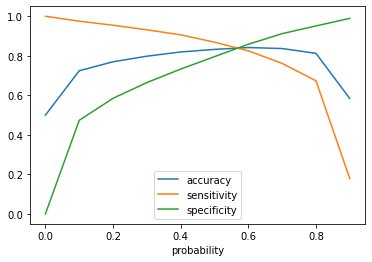

In [161]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

**Observation** - 0.6 have optimal balance between 'accuracy','sensitivity','specificity'. Hence we will choose this value as cut-off for predicting churn - non-churn class

In [162]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.6036,0,1,1,1,1,1,1,1,0,0,0,1
1,0,0.6440,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.8585,2,1,1,1,1,1,1,1,1,1,0,1
3,0,0.3616,3,1,1,1,1,0,0,0,0,0,0,0
4,0,0.2121,4,1,1,1,0,0,0,0,0,0,0,0


In [163]:
# Confusion metrics
confusion = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[13174  2177]
 [ 2684 12667]]


In [164]:
# Calculate metrics
metric_log_train = calculate_metrics(y_train_pred_final['churn'], y_train_pred_final['predicted'], confusion)

Accuracy :  0.841671552341867
Sensitivity :  0.8251579701648101
Specificity :  0.8581851345189239


In [165]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

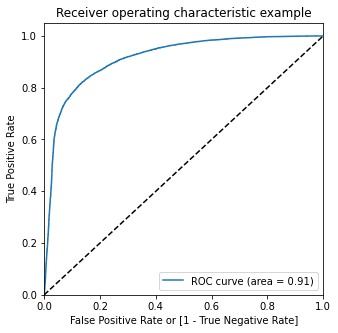

In [166]:
# Draw ROC
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

**Observation** - ROC curve score looks promising

In [167]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
log_model_columns = list_of_columns
X_test_log = X_test[list_of_columns]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [168]:
# Predict on the test set
y_test_pred = logm4.predict(X_test_sm)

In [169]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
52306,0.0057
51501,0.0008
50711,0.2753
55473,0.4321
57087,0.5948


In [170]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
52306,0
51501,0
50711,0
55473,0
57087,0


In [171]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [172]:
# Removing index form the both dataframes for merging them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_df], axis=1)

y_test_pred_final.head()

,churn_probability,CustID,0
0,0,52306,0.0057
1,0,51501,0.0008
2,0,50711,0.2753
3,0,55473,0.4321
4,0,57087,0.5948


In [173]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob', 'churn_probability':'churn'})

In [174]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['CustID','churn','churn_prob']]
y_test_pred_final.head()

,CustID,churn,churn_prob
0,52306,0,0.0057
1,51501,0,0.0008
2,50711,0,0.2753
3,55473,0,0.4321
4,57087,0,0.5948


In [175]:
# In the test set using probablity cutoff 0.6, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,52306,0,0.0057,0
1,51501,0,0.0008,0
2,50711,0,0.2753,0
3,55473,0,0.4321,0
4,57087,0,0.5948,0


In [176]:
# Confusion matrix
confusion = confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[3330  555]
 [  78  236]]


In [177]:
# Calculate metrics
metric_log_test = calculate_metrics(y_test_pred_final['churn'], y_test_pred_final['test_predicted'], confusion)

Accuracy :  0.8492498213860443
Sensitivity :  0.7515923566878981
Specificity :  0.8571428571428571


### Decision Tree without PCA

In [178]:
# Instantiate Decision Tree Classifier
dt_model_basic = DecisionTreeClassifier(random_state=42, max_depth=4)

In [179]:
# Fit model on X_train
dt_model_basic.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [180]:
# Predict value from test and train dataset
y_train_pred = dt_model_basic.predict(X_train)
y_test_pred = dt_model_basic.predict(X_test)

In [181]:
# Print Classification report for train set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88     15351
           1       0.89      0.85      0.87     15351

    accuracy                           0.87     30702
   macro avg       0.88      0.87      0.87     30702
weighted avg       0.88      0.87      0.87     30702



In [182]:
# Print Classification report for test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3885
           1       0.36      0.76      0.49       314

    accuracy                           0.88      4199
   macro avg       0.67      0.83      0.71      4199
weighted avg       0.93      0.88      0.90      4199



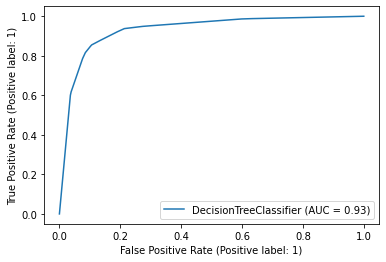

In [183]:
# Plot ROC curve
plot_roc_curve(dt_model_basic, X_train, y_train, drop_intermediate=False)
plt.show()

**Observation** - AUC score looks promising

In [184]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)

# Calculate metrics
metric_dt_basic_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8745032896879682
Sensitivity :  0.8548628753827112
Specificity :  0.8941437039932252


In [185]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

# Calculate metrics
metric_dt_basic_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8797332698261491
Sensitivity :  0.7611464968152867
Specificity :  0.8893178893178894


In [186]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

dt_model = GridSearchCV(estimator=dtree,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the grid search to the data
dt_model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [187]:
# Printing the best hyperparameter alpha
print('Best Score : ', dt_model.best_score_)
print('Best Param Estimator', dt_model.best_estimator_)

Best Score :  0.8997167154501883
Best Param Estimator DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


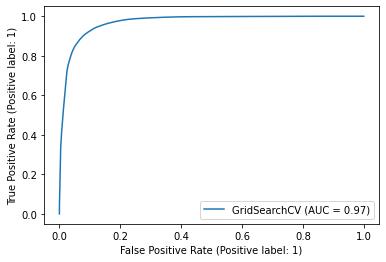

In [188]:
# Plot ROC Curve
plot_roc_curve(dt_model, X_train, y_train)
plt.show()

**Observation** - AUC score looks promising

In [189]:
# Predictions on the train set
y_train_pred = dt_model.predict(X_train)

# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[13877  1474]
 [ 1203 14148]]


In [190]:
# Calculate metrics
metric_dt_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9128069832584197
Sensitivity :  0.9216337697869845
Specificity :  0.9039801967298547


In [191]:
# Prediction on the test set
y_test_pred = dt_model.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3471  414]
 [  83  231]]


In [192]:
# Calculate metrics
metric_dt_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8816384853536556
Sensitivity :  0.7356687898089171
Specificity :  0.8934362934362934


### Random Forest Classifier without PCA

In [193]:
# Instantiate Random Forest Classifier
rf_model_basic = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [194]:
# Fit the model to training dataset
rf_model_basic.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [195]:
# Out of bag (OOB) score
print('Out of Bag (OOB) score is : ', rf_model_basic.oob_score_)

Out of Bag (OOB) score is :  0.8253533971728226


In [196]:
# Predict value from test and train dataset
y_train_pred = rf_model_basic.predict(X_train)
y_test_pred = rf_model_basic.predict(X_test)

In [197]:
# Print Classification report for train set
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85     15351
           1       0.89      0.79      0.84     15351

    accuracy                           0.84     30702
   macro avg       0.85      0.84      0.84     30702
weighted avg       0.85      0.84      0.84     30702



In [198]:
# Print Classification report for test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      3885
           1       0.36      0.72      0.48       314

    accuracy                           0.88      4199
   macro avg       0.67      0.81      0.71      4199
weighted avg       0.93      0.88      0.90      4199



In [199]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)

# Calculate metrics
metric_rf_basic_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8446355286300566
Sensitivity :  0.7868542765943587
Specificity :  0.9024167806657547


In [200]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

# Calculate metrics
metric_rf_basic_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8823529411764706
Sensitivity :  0.7197452229299363
Specificity :  0.8954954954954955


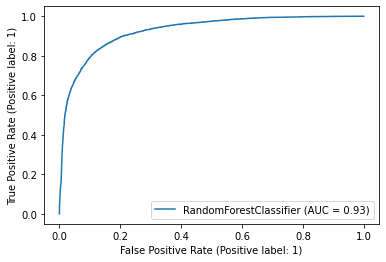

In [201]:
# Plot ROC curve
plot_roc_curve(rf_model_basic, X_train, y_train)
plt.show()

**Observation** - AUC score looks promising

In [202]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [10, 20, 50], 
    'max_features': [10, 20]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate the grid search model
rf_model = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the model
rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [10, 20, 50]},
             scoring='recall', verbose=1)

In [203]:
# Printing the best hyperparameter alpha
print('Best Score : ', rf_model.best_score_)
print('Best Param Estimator', rf_model.best_estimator_)

Best Score :  0.9106033894091756
Best Param Estimator RandomForestClassifier(max_depth=10, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=20, n_jobs=-1,
                       random_state=42)


In [204]:
# Predictions on the train set
y_train_pred = rf_model.predict(X_train)

# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14135  1216]
 [ 1144 14207]]


In [205]:
# Calculate metrics
metric_rf_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9231320435150805
Sensitivity :  0.9254771676112306
Specificity :  0.9207869194189303


In [206]:
# Prediction on the test set
y_test_pred = rf_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3534  351]
 [  81  233]]


In [207]:
# Calculate metrics
metric_rf_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8971183615146463
Sensitivity :  0.7420382165605095
Specificity :  0.9096525096525097


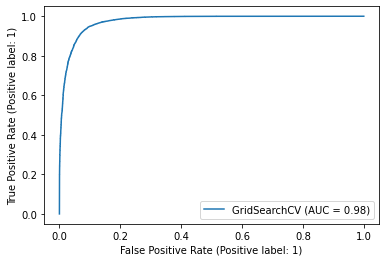

In [208]:
# Plot ROC curve
plot_roc_curve(rf_model, X_train, y_train)
plt.show()

**Observation** - AUC score looks promising

In [209]:
# Get important features
rf_model_est = rf_model.best_estimator_
rf_model_est.feature_importances_

array([1.17225363e-03, 3.10988300e-03, 9.21089285e-03, 4.88510106e-04,
       2.15452471e-03, 1.27980015e-03, 4.79228774e-04, 1.83903545e-03,
       1.82139441e-02, 2.17306277e-03, 3.20503573e-03, 7.94201637e-02,
       7.31373348e-04, 1.97417068e-03, 9.28360536e-02, 9.36313185e-04,
       9.37323766e-04, 1.75094422e-03, 2.20803170e-03, 1.05737633e-03,
       6.22086009e-02, 9.87542215e-04, 7.12889759e-04, 3.63078516e-04,
       3.64406293e-04, 4.93389472e-03, 1.84562317e-03, 1.79520625e-03,
       2.53087680e-03, 2.68278570e-02, 1.20717678e-03, 3.30266392e-03,
       1.72913895e-03, 1.43284265e-03, 1.43264959e-03, 1.85421276e-03,
       6.08618033e-05, 2.93653742e-04, 0.00000000e+00, 1.22987369e-03,
       5.29226457e-03, 2.24784169e-03, 2.42321367e-04, 1.93911286e-04,
       1.30026212e-03, 1.59179937e-03, 6.04218534e-03, 2.08111542e-03,
       1.05881823e-03, 0.00000000e+00, 0.00000000e+00, 9.22894610e-04,
       2.46025830e-03, 8.04811170e-03, 5.91645284e-04, 1.01413395e-03,
      

In [210]:
# Display important features
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_model_est.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.1558
95,total_rech_amt_8,0.1297
65,loc_ic_mou_8,0.0980
14,roam_og_mou_8,0.0928
11,roam_ic_mou_8,0.0794
...,...,...
49,og_others_mou_7,0.0000
50,og_others_mou_8,0.0000
120,sachet_3g_6,0.0000
121,sachet_3g_7,0.0000


### Adaboost without PCA

In [211]:
# Instantiate Adaboost Classifier
adaboost_basic_model =  AdaBoostClassifier(n_estimators=200, random_state=42)

# Fitting Model
adaboost_basic_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [212]:
# Predictions on the train set
y_train_pred = adaboost_basic_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14393   958]
 [  793 14558]]


In [213]:
# Calculate metrics
metric_ad_basic_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9429678848283499
Sensitivity :  0.9483421275486938
Specificity :  0.937593642108006


In [214]:
# Predictions on the test set
y_test_pred = adaboost_basic_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3616  269]
 [ 120  194]]


In [215]:
# Calculate metrics
metric_ad_basic_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.907358894974994
Sensitivity :  0.6178343949044586
Specificity :  0.9307593307593307


In [216]:
# Hyperparameters for Tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [1, 2, 5, 10]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
ab = AdaBoostClassifier(random_state=42)

# Instantiate the grid search model
adaboost_model = GridSearchCV(estimator=ab,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the model
adaboost_model.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='recall', verbose=1)

In [217]:
# Predictions on the train set
y_train_pred = adaboost_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14393   958]
 [  793 14558]]


In [218]:
# Calculate metrics
metric_ad_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9429678848283499
Sensitivity :  0.9483421275486938
Specificity :  0.937593642108006


In [219]:
# Predictions on the test set
y_test_pred = adaboost_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3616  269]
 [ 120  194]]


In [220]:
# Calculate metrics
metric_ad_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.907358894974994
Sensitivity :  0.6178343949044586
Specificity :  0.9307593307593307


### Gradient Boosting without PCA

In [221]:
# Instatiate Gradient Boostig (GB)
gb_model = GradientBoostingClassifier(random_state=42) # default 
gb_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [222]:
# Fit the model to our train and target
gb_model.fit(X_train, y_train)

# Predictions on the train set
y_train_pred = gb_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[14285  1066]
 [  862 14489]]


In [223]:
# Calculate metrics
metric_gb_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.937202788091981
Sensitivity :  0.9438473063644063
Specificity :  0.9305582698195557


In [224]:
# Predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3584  301]
 [  93  221]]


In [225]:
# Calculate metrics
metric_gb_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.9061681352703025
Sensitivity :  0.7038216560509554
Specificity :  0.9225225225225225


### Extreme Gradient Boosting without PCA

In [226]:
# Instatiate Extream Gradient Boostig (XGB)
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [227]:
# Fit the model to our train and target
xgb_model.fit(X_train, y_train)

# Predictions on the train set
y_train_pred = xgb_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[19:55:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[15326    25]
 [   17 15334]]


In [228]:
# Calculate metrics
metric_xgb_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9986320109439124
Sensitivity :  0.9988925802879292
Specificity :  0.9983714415998958


In [229]:
# Predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3732  153]
 [ 144  170]]


In [230]:
# Calculate metrics
metric_xgb_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.9292688735413194
Sensitivity :  0.5414012738853503
Specificity :  0.9606177606177606


<hr style="border:1px solid red">

### Evaluate Metrics for all models

In [231]:
# Creating a table which contains all the metrics
metric_dict = {'Metric' : ['Accuracy', 'Sensitivity', 'Specificity'],
               'Logistic Regression with PCA (Train)' : metric_log_pca_train, 
               'Logistic Regression with PCA (Test)' : metric_log_pca_test,
               'Decision Tree with PCA (Train)' : metric_dt_pca_train, 
               'Decision Tree with PCA (Test)' : metric_dt_pca_test,
               'Random Forest with PCA (Train)' : metric_rf_pca_train, 
               'Random Forest with PCA (Test)' : metric_rf_pca_test,
               'Adaboost with PCA (Train)' : metric_ad_pca_train, 
               'Adaboost with PCA (Test)' : metric_ad_pca_test,
               'GBboost with PCA (Train)' : metric_gb_pca_train,
               'GBboost with PCA (Test)' : metric_gb_pca_test,
               'XGBboost with PCA (Train)' : metric_xgb_pca_train,
               'XGBboost with PCA (Test)' : metric_xgb_pca_test,
               'Logistic Regression (Train)' : metric_log_train, 
               'Logistic Regression (Test)' : metric_log_test,
               'Decision Tree (Train)' : metric_dt_train, 
               'Decision Tree (Test)' : metric_dt_test,
               'Random Forest (Train)' : metric_rf_train, 
               'Random Forest (Test)' : metric_rf_test,
               'Adaboost (Train)' : metric_ad_train, 
               'Adaboost (Test)' : metric_ad_test,
               'GBboost (Train)' : metric_gb_train,
               'GBboost (Test)' : metric_gb_test,
               'XGBboost (Train)' : metric_xgb_train,
               'XGBboost (Test)' : metric_xgb_test}

metric_df = pd.DataFrame(metric_dict)
metric_df

,Metric,Logistic Regression with PCA (Train),Logistic Regression with PCA (Test),Decision Tree with PCA (Train),Decision Tree with PCA (Test),Random Forest with PCA (Train),Random Forest with PCA (Test),Adaboost with PCA (Train),Adaboost with PCA (Test),GBboost with PCA (Train),GBboost with PCA (Test),XGBboost with PCA (Train),XGBboost with PCA (Test),Logistic Regression (Train),Logistic Regression (Test),Decision Tree (Train),Decision Tree (Test),Random Forest (Train),Random Forest (Test),Adaboost (Train),Adaboost (Test),GBboost (Train),GBboost (Test),XGBboost (Train),XGBboost (Test)
0,Accuracy,0.8457,0.8228,0.8663,0.8192,0.8972,0.8759,0.8752,0.8488,0.8829,0.8633,0.9975,0.9045,0.8417,0.8492,0.9128,0.8816,0.9231,0.8971,0.9430,0.9074,0.9372,0.9062,0.9986,0.9293
1,Sensitivity,0.8674,0.7930,0.8725,0.6783,0.8861,0.6752,0.8850,0.7197,0.8831,0.7452,0.9993,0.5796,0.8252,0.7516,0.9216,0.7357,0.9255,0.7420,0.9483,0.6178,0.9438,0.7038,0.9989,0.5414
2,Specificity,0.8241,0.8252,0.8601,0.8306,0.9084,0.8921,0.8654,0.8592,0.8828,0.8728,0.9957,0.9308,0.8582,0.8571,0.9040,0.8934,0.9208,0.9097,0.9376,0.9308,0.9306,0.9225,0.9984,0.9606


**Observation** - We can see models without PCA outperforms their corressponding models without PCA respectively.

<hr style="border:1px solid green">

## Predict with test data

### Data Understanding

In [232]:
# Read the test dataset
test_df = pd.read_csv('test.csv')

In [233]:
# Check the shape of the dataframe
print('The test data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(test_df.shape[0],test_df.shape[1]))

The test data set have 30000 rows and 171 columns.

Let's see first 5 values of data set.


In [234]:
# Check the first five rows
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [235]:
# Check the dataframe info
test_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence, we will do similar imputation done for train data.

3) We need to remove unnecessary features.

4) We need to rename feature names.


### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [236]:
# Check if there is any duplicated entries in rows
test_df[test_df.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g


**Observation** : There are no such rows that have duplicated entries.

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [237]:
# Check the number of columns having null values across entire index range
test_df.isnull().all().sum()

0

In [238]:
# Check the number of rows having null values across entire column range
test_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

In [239]:
# Rename column names as per majority convension
temp_dict = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
             'og_others_6' : 'og_others_mou_6', 'og_others_7' : 'og_others_mou_7', 'og_others_8' : 'og_others_mou_8',
             'ic_others_6' : 'ic_others_mou_6', 'ic_others_7' : 'ic_others_mou_7', 'ic_others_8' : 'ic_others_mou_8'}
test_df = test_df.rename(temp_dict, axis=1)

In [240]:
# Find percentage of missing values in date column
find_missing_percentage(test_df, test_df.columns, 0)

arpu_3g_6                   74.7167
count_rech_3g_6             74.7167
fb_user_6                   74.7167
night_pck_user_6            74.7167
total_rech_data_6           74.7167
max_rech_data_6             74.7167
count_rech_2g_6             74.7167
date_of_last_rech_data_6    74.7167
av_rech_amt_data_6          74.7167
arpu_2g_6                   74.7167
night_pck_user_7            74.3133
arpu_2g_7                   74.3133
fb_user_7                   74.3133
arpu_3g_7                   74.3133
count_rech_2g_7             74.3133
av_rech_amt_data_7          74.3133
max_rech_data_7             74.3133
count_rech_3g_7             74.3133
total_rech_data_7           74.3133
date_of_last_rech_data_7    74.3133
night_pck_user_8            73.5933
arpu_3g_8                   73.5933
arpu_2g_8                   73.5933
count_rech_3g_8             73.5933
total_rech_data_8           73.5933
av_rech_amt_data_8          73.5933
max_rech_data_8             73.5933
fb_user_8                   

In [241]:
# Get the columns with 'mou' (Minutes of usage voice calls) in its name
list_of_columns = [m for m in test_df.columns.to_list() if 'mou' in m]
# Append Other Telecom feature columns
list_of_columns += ['og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'ic_others_mou_6', 'ic_others_mou_7',
                   'ic_others_mou_8']

# Impute zero for missing values in MOU columns
for col in list_of_columns:
    test_df[col].fillna(0.00, inplace=True)

In [242]:
# Impute zero for missing values in following columns
list_of_columns = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

# Impute zero for missing values in above columns
for col in list_of_columns:
    test_df[col].fillna(0, inplace=True)

In [243]:
# Delete columns as done for train dataset
test_df.drop(labels = dropped_columns, axis = 1, inplace = True)

In [244]:
# Find percentage of missing values in date column
find_missing_percentage(test_df, test_df.columns, 0)

Series([], dtype: float64)


**Observation** - No missing value

In [245]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(test_df.shape[0], test_df.shape[1]))

The data set now have 30000 rows and 127 columns


In [246]:
# Check the first five rows
test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,45.36,207.18,24.01,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,50

In [247]:
# Create X_test dataframe
X_test = test_df

In [248]:
# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
list_of_columns = X_test.columns
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

In [249]:
# Read the solution dataset for calculating accuracy of test set
solution_df = pd.read_csv('sample.csv')

In [250]:
# Check the shape of the dataframe
print('The solution data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(solution_df.shape[0],solution_df.shape[1]))

The solution data set have 30000 rows and 2 columns.

Let's see first 5 values of data set.


In [251]:
# Check the first five rows
solution_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


### Prediction with PCA models

In [252]:
# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

#### Prediction with Logistic Regression with PCA

In [253]:
# Prediction on the test set using Logistic Regression with PCA
y_test_pred = log_pca_model.predict(X_test_pca)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_log_pca_df = pd.DataFrame(y_test_pred)
y_pred_log_pca_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_log_pca_df[0])
print(confusion)

[[17472  9469]
 [  349  2710]]


In [254]:
# Calculate metrics
metric_test_with_log_pca = calculate_metrics(solution_df['churn_probability'], y_pred_log_pca_df[0], confusion)

Accuracy :  0.6727333333333333
Sensitivity :  0.8859104282445244
Specificity :  0.6485282654689878


#### Prediction with Decision Tree with PCA

In [255]:
# Prediction on the test set using Logistic Regression with PCA
y_test_pred = dt_pca_model.predict(X_test_pca)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_dt_pca_df = pd.DataFrame(y_test_pred)
y_pred_dt_pca_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_dt_pca_df[0])
print(confusion)

[[17081  9860]
 [  508  2551]]


In [256]:
# Calculate metrics
metric_test_with_dt_pca = calculate_metrics(solution_df['churn_probability'], y_pred_dt_pca_df[0], confusion)

Accuracy :  0.6544
Sensitivity :  0.8339326577312848
Specificity :  0.6340150699677072


#### Prediction with Random Forest with PCA

In [257]:
# Prediction on the test set using Logistic Regression with PCA
y_test_pred = rf_pca_model.predict(X_test_pca)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_rf_pca_df = pd.DataFrame(y_test_pred)
y_pred_rf_pca_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_rf_pca_df[0])
print(confusion)

[[17816  9125]
 [  443  2616]]


In [258]:
# Calculate metrics
metric_test_with_rf_pca = calculate_metrics(solution_df['churn_probability'], y_pred_rf_pca_df[0], confusion)

Accuracy :  0.6810666666666667
Sensitivity :  0.8551814318404708
Specificity :  0.6612969080583497


#### Prediction with Adaboost with PCA

In [259]:
# Prediction on the test set using Logistic Regression with PCA
y_test_pred = adaboost_pca_model.predict(X_test_pca)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_ab_pca_df = pd.DataFrame(y_test_pred)
y_pred_ab_pca_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_ab_pca_df[0])
print(confusion)

[[17967  8974]
 [  442  2617]]


In [260]:
# Calculate metrics
metric_test_with_ab_pca = calculate_metrics(solution_df['churn_probability'], y_pred_ab_pca_df[0], confusion)

Accuracy :  0.6861333333333334
Sensitivity :  0.8555083360575352
Specificity :  0.6669017482647266


### Prediction without PCA models

#### Prediction with Logistic Regression

In [261]:
# Logistic Regression prediction
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
print(log_model_columns)
X_test_log = X_test[log_model_columns]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

# Predict on the test set
y_test_pred = logm4.predict(X_test_sm)

['arpu_7', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8']


In [262]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_log_df = pd.DataFrame(y_test_pred)
y_pred_log_df[0] = y_pred_log_df[0].map(lambda x: 1 if x > 0.6 else 0)

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_log_df[0])
print(confusion)

[[18992  7949]
 [  403  2656]]


In [263]:
# Calculate metrics
metric_test_with_log = calculate_metrics(solution_df['churn_probability'], y_pred_log_df[0], confusion)

Accuracy :  0.7216
Sensitivity :  0.8682576005230468
Specificity :  0.7049478490033777


#### Prediction with Decision Tree

In [264]:
# Prediction on the test set using Logistic Regression with PCA
y_test_pred = dt_model.predict(X_test)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_dt_df = pd.DataFrame(y_test_pred)
y_pred_dt_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_dt_df[0])
print(confusion)

[[21963  4978]
 [  597  2462]]


In [265]:
# Calculate metrics
metric_test_with_dt = calculate_metrics(solution_df['churn_probability'], y_pred_dt_df[0], confusion)

Accuracy :  0.8141666666666667
Sensitivity :  0.8048381824125531
Specificity :  0.8152258639248728


#### Prediction with Random Forest

In [266]:
# Prediction on the test set using Random Forest
y_test_pred = rf_model.predict(X_test)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_rf_df = pd.DataFrame(y_test_pred)
y_pred_rf_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_rf_df[0])
print(confusion)

[[23130  3811]
 [  472  2587]]


In [267]:
# Calculate metrics
metric_test_with_rf = calculate_metrics(solution_df['churn_probability'], y_pred_rf_df[0], confusion)

Accuracy :  0.8572333333333333
Sensitivity :  0.8457012095456031
Specificity :  0.858542741546342


#### Prediction with Adaboost

In [268]:
# Prediction on the test set using Random Forest
y_test_pred = adaboost_model.predict(X_test)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_ab_df = pd.DataFrame(y_test_pred)
y_pred_ab_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_ab_df[0])
print(confusion)

[[23752  3189]
 [  696  2363]]


In [269]:
# Calculate metrics
metric_test_with_ab = calculate_metrics(solution_df['churn_probability'], y_pred_ab_df[0], confusion)

Accuracy :  0.8705
Sensitivity :  0.7724746649231775
Specificity :  0.8816302290189674


#### Prediction with GBboost

In [270]:
# Prediction on the test set using Gradient Boosting
y_test_pred = gb_model.predict(X_test)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_gb_df = pd.DataFrame(y_test_pred)
y_pred_gb_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_gb_df[0])
print(confusion)

[[23986  2955]
 [  580  2479]]


In [271]:
# Calculate metrics
metric_test_with_gb = calculate_metrics(solution_df['churn_probability'], y_pred_gb_df[0], confusion)

Accuracy :  0.8821666666666667
Sensitivity :  0.810395554102648
Specificity :  0.8903158754314985


#### Prediction with XGBboost

In [272]:
# Prediction on the test set using Extreme Gradient Boosting
y_test_pred = xgb_model.predict(X_test)

# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_xgb_df = pd.DataFrame(y_test_pred)
y_pred_xgb_df.head()

# Confusion matrix
confusion = metrics.confusion_matrix(solution_df['churn_probability'], y_pred_xgb_df[0])
print(confusion)

[[25825  1116]
 [  950  2109]]


In [273]:
# Calculate metrics
metric_test_with_xgb = calculate_metrics(solution_df['churn_probability'], y_pred_xgb_df[0], confusion)

Accuracy :  0.9311333333333334
Sensitivity :  0.6894409937888198
Specificity :  0.9585761478786979


<hr style="border:1px solid red">

### Evaluate Metrics for all models

In [274]:
# Creating a table which contains all the metrics
metric_dict = {'Metric' : ['Accuracy', 'Sensitivity', 'Specificity'],
               'Logistic Regression with PCA' : metric_test_with_log_pca, 
               'Decision Tree with PCA' : metric_test_with_dt_pca,
               'Random Forest with PCA' : metric_test_with_rf_pca, 
               'Adaboost with PCA' : metric_test_with_ab_pca,
               'Logistic Regression' : metric_test_with_log, 
               'Decision Tree' : metric_test_with_dt,
               'Random Forest' : metric_test_with_rf, 
               'Adaboost' : metric_test_with_ab,
               'GBoost' : metric_test_with_gb,
               'XGBoost' : metric_test_with_xgb}

metric_df = pd.DataFrame(metric_dict)
metric_df

,Metric,Logistic Regression with PCA,Decision Tree with PCA,Random Forest with PCA,Adaboost with PCA,Logistic Regression,Decision Tree,Random Forest,Adaboost,GBoost,XGBoost
0,Accuracy,0.6727,0.6544,0.6811,0.6861,0.7216,0.8142,0.8572,0.8705,0.8822,0.9311
1,Sensitivity,0.8859,0.8339,0.8552,0.8555,0.8683,0.8048,0.8457,0.7725,0.8104,0.6894
2,Specificity,0.6485,0.6340,0.6613,0.6669,0.7049,0.8152,0.8585,0.8816,0.8903,0.9586


**Observation** : We got very good scores without PCA. And we choose XGBoost for classification.

In [275]:
# Important features from XGBoost
imp_df = pd.DataFrame({
    "Varname": X_test.columns,
    "Imp": xgb_model.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
80,total_ic_mou_8,0.1745
65,loc_ic_mou_8,0.0863
14,roam_og_mou_8,0.0748
104,av_rech_amt_data_8,0.0279
111,monthly_2g_6,0.0218
...,...,...
68,std_ic_t2t_mou_8,0.0016
28,loc_og_mou_7,0.0015
78,total_ic_mou_6,0.0013
15,loc_og_t2t_mou_6,0.0010


In [276]:
# Copy XGBoost predicted values to solution
solution_df['churn_probability'] = y_pred_xgb_df[0]

In [277]:
# Check the first five rows
solution_df.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [278]:
# Write solution.csv
solution_df.to_csv('Submission.csv', index=False)

<hr style="border:1px solid black">

### Conclusion

* Various models was built with and without PCA.
* Models performed well without PCA.
* GBoost and XGBoost without PCA outperformed all models
* XGBoost was selected for final prediction

### Recommended Top 5 features

* total_ic_mou_8 - 0.1745
* loc_ic_mou_8 - 0.0863
* roam_og_mou_8 - 0.0748
* av_rech_amt_data_8 - 0.0279
* monthly_2g_6 - 0.0218

These features helps in realizing if a customer will churn or not.

<hr style="border:1px solid red">